# Housing market in 1990, California

## Introduction

Today’s house pricing is rising rapidly. Even during the COVID-19 pandemic, house supply is lower than the demand in the US. The economist, Danielle Hale, expects, in 2021, the sale will grow 7 percent, and the price will reach 5.7 percent higher compared to the last year (Richardson, 2020). The supply quantity is far less than the demand that prices tend to rise faster. Due to the fast price changes, more than a third of US citizens rent a home while they cannot afford to buy a house with their income (“Statista,” 2019).

Then how was the situation different from now back in 1990? Was the income enough to afford a house in California? How did the income change the value of the house price to buy? Besides, house prices tend to fluctuate depending on extreme hazards, such as earthquakes. House median listing price per sq. ft. decreased by approximately 6% and 3% after high-casualty earthquakes occur near California (Fekrzad, 2019). In the project, the other price changing sources will be explored how the house price changes. The main focus is what factor can fluctuate the house price by the most. All the outside elements will be examined more thoroughly. 

To find the cause and the result of the housing market, the data of “California Housing Price” from Kaggle will be the primary source that will be used. The main focus is on the House price of California, 1990. However, using this data and new data obtained from external sources, the future house price and affordability can be explored as well. By comparing the past, current and future data, it will be able to explain if the house price in 1990 was reasonable for the majority of people or not.

To explore all the topics, the apparent dependent variable will be the house price. The other independent variables, such as income, age, and house price, will examine how they can change the output and house price.

The relationship between the output and the inputs will be examined thoroughly in the last part of the project. It will help to interpret and summarize the whole project by conducting solid relations. At the end of this study, the various perspective to analyze the past housing price and affordability will be established.

# Project 1

In 1990, US inflation was higher than now, which was 10.13% in the early 1990s (Graham, 2020). For this part of the project, without knowing the exact mortgage and consumption rate, the “3x Rule” will be used for simplicity. The rule assumes that the price that people can afford is three times the annual gross income (Dogen, 2020). The variable “housing_median_age” will be used to calculate the age of people who could afford the home from the data. The variable “median_income” will compare the affordable price in the particular region and the actual house value. The cost of the house will be the outcome of these two variables. The “median_house_value” will also be used to find the relationship between the housing age and the house value. The output will give the appropriate value of the house to buy in which age range. 

Throughout the project, the “housing_median_age,” “median_income,” and “median_house_value” will be used mainly to investigate various relationships from the data provided through graphs and charts.

## Data Analysis

The required packages are imported below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.linear_model import LinearRegression

import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt

%matplotlib inline

The raw data from `Kaggle` will be read and used to explore housing in California, 1990.

In [2]:
house = pd.read_csv('housing.csv')

In [3]:
house_df = pd.DataFrame(house)
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


It is helpful to clean the data first for efficient data analysis. The chart above is the original data given from `Kaggle`.

In [4]:
house_df.isnull().sum() 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Two hundred seven values are missing for total_bedrooms. The rows with the missing information will be deleted. The missing data are described below.

In [5]:
house_df[house_df.isna().any(axis=1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


These data will be deleted for better analysis.

In [6]:
house_df.dropna(inplace=True)
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The analysis will be done numerically. Therefore, having the same unit is critical. To compare the house's value and the income in the same unit (in dollars), multiply 10000 to "median_income".

In [7]:
house_df['median_income'] = house_df['median_income'].multiply(10000)
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,NEAR BAY


### Age Group

The age group will be analyzed in this section. The distribution of the age group who are housing will be shown visually to investigate the trend. Will certain ages have the best condition for housing?

Text(0.5, 1.0, 'Housing Median Age in 1990, California')

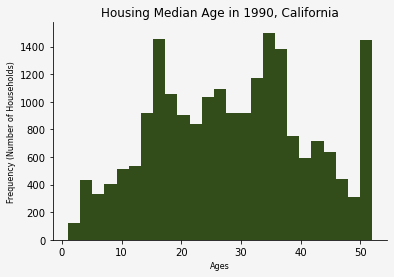

In [8]:
plt=__import__("matplotlib.pyplot")

fig, ax = plt.pyplot.subplots()
house_df.plot(
    kind="hist", y="housing_median_age", color=(50/255, 77/255, 25/255),
    bins=25, legend=False, density=False, ax=ax
)
ax.set_facecolor((0.96, 0.96, 0.96))
fig.set_facecolor((0.96, 0.96, 0.96))
ax.set_xlabel('Ages', fontsize = 8)
ax.set_ylabel('Frequency (Number of Households)', fontsize = 8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Housing Median Age in 1990, California")

The above graph represents the different age groups of people who bought the house. The age in teenagers and age between 30 and 40 seem to have a home.

The age range is used to divide the group of people into intervals of age. The data was split into intervals of age 10 to count the exact number of people.

In [9]:
bins = pd.cut(house_df['housing_median_age'], [0, 10, 20, 30, 40, 50, 60, 70])
housing_age_group = house_df.groupby(bins)['housing_median_age'].agg(['count'])
housing_age_group 

,count
housing_median_age,
"(0, 10]",1556
"(10, 20]",4680
"(20, 30]",4803
"(30, 40]",5554
"(40, 50]",2528
"(50, 60]",1312
"(60, 70]",0


The data frame above represents the number of different age-grouped people who bought a house in California. Most of the people who were buying a home were 30 to 40 years old. It is probably they have the best condition to buy a house. The earning rate is the highest that they can invest money in the house. However, before teenagers or after 60 years old, they will have a lower earning rate than the consumption. They will instead borrow more. Therefore, they cannot obtain a house. 

### Median Income

Median income will be analyzed in this section. It is one of the main factors that can fluctuate the housing price. The price depends on the demand of the house buyers. People will tend to invest more in houses if people can earn more, and the price will tend to get higher.

To compare the house price using the income, the numerical summary was used.

In [10]:
house_df['median_income'].describe()

count     20433.000000
mean      38711.616013
std       18992.912493
min        4999.000000
25%       25637.000000
50%       35365.000000
75%       47440.000000
max      150001.000000
Name: median_income, dtype: float64

The maximum income was 150001.00 dollars, and the minimum was 4999.00 dollars.
The overall average income was 38711.16 dollars.

Text(0.5, 1.0, 'Housing Median Income in 1990, California')

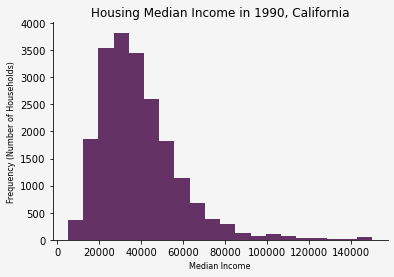

In [11]:
# Histogram of the median income
plt=__import__("matplotlib.pyplot")

fig, ax = plt.pyplot.subplots()
house_df.plot(
    kind="hist", y="median_income", color=(100/255, 50/255, 100/255),
    bins=20, legend=False, density=False, ax=ax
)
ax.set_facecolor((0.96, 0.96, 0.96))
fig.set_facecolor((0.96, 0.96, 0.96))
ax.set_xlabel('Median Income', fontsize = 8)
ax.set_ylabel('Frequency (Number of Households)', fontsize = 8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Housing Median Income in 1990, California")

The median income can also be represented on the histogram. It looks like a normal distribution with a unimodal that is right-skewed. Thus, the median was less than the mean. Some fewer people could earn a lot of money than those who could make less than the average.  Most people were earning between 20000 to 40000 dollars.

### In what age interval do people have the most income? 

To answer this question, the scatterplot will be used.

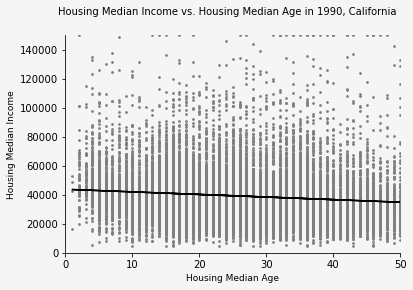

In [12]:
plt=__import__("matplotlib.pyplot")

fig, ax = plt.pyplot.subplots()
house_df.plot(kind="scatter", x="housing_median_age", y="median_income", ax=ax, s=3, color="grey")

bgcolor = (250/255, 250/255, 250/255)
ax.set_facecolor((0.96, 0.96, 0.96))
fig.set_facecolor((0.96, 0.96, 0.96))
ax.set_xlim(0, 50)
ax.set_ylim(0, 150000)
fig.suptitle('Housing Median Income vs. Housing Median Age in 1990, California', fontsize=10)
ax.set_xlabel('Housing Median Age', fontsize=9)
ax.set_ylabel('Housing Median Income', fontsize=9)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

lr = LinearRegression()
x = house_df["housing_median_age"].values.reshape(-1, 1)
y = house_df["median_income"].values.reshape(-1, 1) 
lr.fit(x, y)

y_pred = lr.predict(x)
ax.plot(x, y_pred, color="Black")

From the scatterplot, there was no significant difference between teenagers to age 40.
However, looking at the maximum of each age group, the age between 30 to 40 had the highest income, and the income started to decrease starting at 40. Therefore, the slightly negative slope was created using linear regression.

### Did older people buy more expensive houses?

Using the scatter plot, the age and the price of the house will be compared.

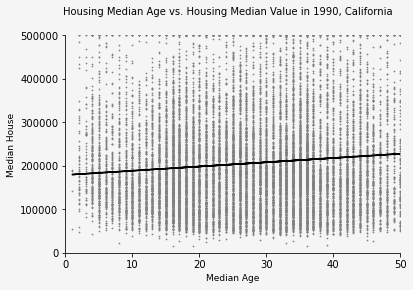

In [13]:
plt=__import__("matplotlib.pyplot")

fig, ax = plt.pyplot.subplots()
house_df.plot(kind="scatter", x="housing_median_age", y="median_house_value", ax=ax, s=0.5, color="grey")

bgcolor = (250/255, 250/255, 250/255)
ax.set_facecolor((0.96, 0.96, 0.96))
fig.set_facecolor((0.96, 0.96, 0.96))
ax.set_xlim(0, 50)
ax.set_ylim(0, 500000)
fig.suptitle('Housing Median Age vs. Housing Median Value in 1990, California', fontsize=10)
ax.set_xlabel('Median Age', fontsize=9)
ax.set_ylabel('Median House', fontsize=9)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

lr = LinearRegression()
x = house_df["housing_median_age"].values.reshape(-1, 1)
y = house_df["median_house_value"].values.reshape(-1, 1) 
lr.fit(x, y)

y_pred = lr.predict(x)
ax.plot(x, y_pred, color="Black")

The graph's result did not give us a clear relationship between the housing age and the house value. Therefore, there is no significant correlation between these two variables.

### Did the higher incomes lead to the more expensive houses?

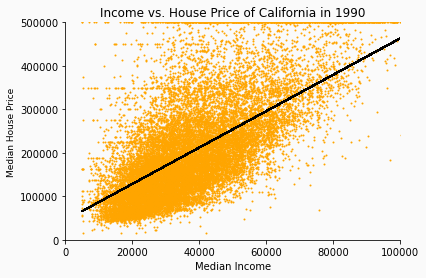

In [14]:
plt=__import__("matplotlib.pyplot")

fig, ax = plt.pyplot.subplots()
house_df.plot(kind="scatter", x="median_income", y="median_house_value", ax=ax, s=1, color="orange")

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)
ax.set_xlim(0, 100000)
ax.set_ylim(0, 500000)
ax.title.set_text('Income vs. House Price of California in 1990')
ax.set_xlabel('Median Income', fontsize=10)
ax.set_ylabel('Median House Price', fontsize=9)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

lr = LinearRegression()
x = house_df["median_income"].values.reshape(-1, 1)
y = house_df["median_house_value"].values.reshape(-1, 1) 
lr.fit(x, y)

y_pred = lr.predict(x)
ax.plot(x, y_pred, color="Black")

The scatter plot above shows a moderate relationship that the more income relates to the more valued house. The trend line indicates that it follows the positive slope.

### Affordable House

The rule of 3 is a convenient estimate to use without other factors involved. It will help to guide the affordable houses of each household. In the project, the affordable homes will be primarily considered because the data does not provide how people who could not afford the house bought the house in detail.

California was considered one of the expensive house price cities in the world. Therefore, analyzing California may help to interpret the other regions in the US.

The value of house price in California, 1990 is summarize below.

In [15]:
house_df['median_house_value'].describe()

count     20433.000000
mean     206864.413155
std      115435.667099
min       14999.000000
25%      119500.000000
50%      179700.000000
75%      264700.000000
max      500001.000000
Name: median_house_value, dtype: float64

The average price of houses was $206864.41. The standard deviation was significant, which is $115435.67. The house price differed by a lot.

#### Rule of Thumb

The rule of 3 required a new column. It will be created by multiplying 3 to the median of income

In [16]:
house_df = house_df.assign(affordable_house = house_df['median_income'].mul(3))

The new column, "affordable_house" is now added to the dataframe, house_df.

In [17]:
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,affordable_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,NEAR BAY,249756.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,NEAR BAY,249042.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,NEAR BAY,217722.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,NEAR BAY,169293.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,NEAR BAY,115386.0


The difference was found and added to the data to compare the affordable price of value and the median house value numerically.

In [18]:
house_df['diff'] = house_df['affordable_house'] - house_df['median_house_value']
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,affordable_house,diff
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,NEAR BAY,249756.0,-202844.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,NEAR BAY,249042.0,-109458.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,NEAR BAY,217722.0,-134378.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,NEAR BAY,169293.0,-172007.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,NEAR BAY,115386.0,-226814.0


The boolean was used to identify to show if the house is affordable. The negative value represents that the house was not affordable for people.

In [19]:
house_df['affordability'] = np.where(house_df['diff'] > 0, "Affordable", "Not Affordable")
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,affordable_house,diff,affordability
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,NEAR BAY,249756.0,-202844.0,Not Affordable
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,NEAR BAY,249042.0,-109458.0,Not Affordable
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,NEAR BAY,217722.0,-134378.0,Not Affordable
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,NEAR BAY,169293.0,-172007.0,Not Affordable
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,NEAR BAY,115386.0,-226814.0,Not Affordable


This summary show how many people was able to afford the house.

In [20]:
num_affordable = house_df['affordability'].value_counts() # count how many people were able to afford a house
num_affordable

Not Affordable    18543
Affordable         1890
Name: affordability, dtype: int64

As a result, 18543 people were able to afford the house with their income and 1890 who could not.

Visually, the result can be represented on the histogram. The red bar represents the household that can afford the house, and the blue bar represents the households that cannot afford the home.

In [21]:
num_affordable = pd.DataFrame(
{"values":[18543, 1890]},
index={"Not Affordable","Affordable" })

Text(0.5, 0, 'Number of Households that can Afford House')

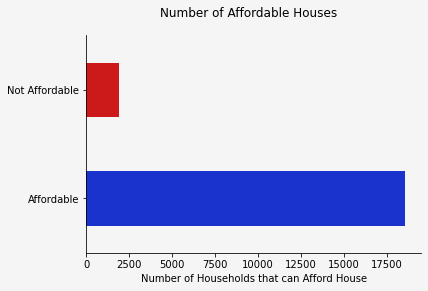

In [22]:
plt=__import__("matplotlib.pyplot")

fig, ax = plt.pyplot.subplots()

num_affordable.plot(kind="barh", y="values", ax=ax, legend=False, color=[(0.1, 0.2, 0.8), (0.8, 0.1, 0.1)])

ax.set_facecolor((0.96, 0.96, 0.96))
fig.set_facecolor((0.96, 0.96, 0.96))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle("Number of Affordable Houses")
ax.set_xlabel('Number of Households that can Afford House', fontsize =10)

In [23]:
# Affordable Percentage
1890 / (1890 + 18543) * 100

9.249743062692703

The fact that only 9.25% of the people could afford a house with a comfortable mortgage rate of consumption represents that the supply of houses did not meet the demand back in 1990.

For more analysis, the affordable rows were collected for analysis.

In [24]:
afford_df = house_df.loc[house_df['affordability'] == "Affordable"]
afford_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,affordable_house,diff,affordability
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,25625.0,60000.0,NEAR BAY,76875.0,16875.0,Affordable
60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,33929.0,75700.0,NEAR BAY,101787.0,26087.0,Affordable
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,61183.0,75000.0,NEAR BAY,183549.0,108549.0,Affordable
64,-122.30,37.81,48.0,828.0,182.0,392.0,133.0,25938.0,73500.0,NEAR BAY,77814.0,4314.0,Affordable
198,-122.23,37.77,52.0,769.0,206.0,612.0,183.0,25700.0,72000.0,NEAR BAY,77100.0,5100.0,Affordable


Text(0.5, 1.0, 'House Affordable Median Age in 1990, California')

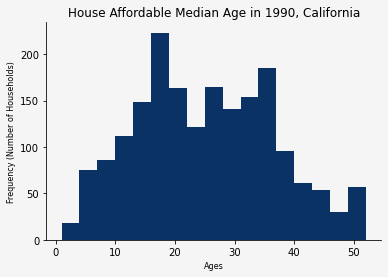

In [25]:
plt=__import__("matplotlib.pyplot")

fig, ax = plt.pyplot.subplots()
afford_df.plot(
    kind="hist", y="housing_median_age", color=(10/255, 50/255, 100/255),
    bins=17, legend=False, density=False, ax=ax
)
ax.set_facecolor((0.96, 0.96, 0.96))
fig.set_facecolor((0.96, 0.96, 0.96))
ax.set_xlabel('Ages', fontsize = 8)
ax.set_ylabel('Frequency (Number of Households)', fontsize = 8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("House Affordable Median Age in 1990, California")

The graph above represents the median age of households that were able to afford the house with their income in California. The most were between 10-20 years old.

In [26]:
afford_df.sum()

longitude                                                       -226160
latitude                                                        69256.6
housing_median_age                                                46930
total_rooms                                                 4.29314e+06
total_bedrooms                                                   818108
population                                                  2.33762e+06
households                                                       758226
median_income                                               6.66667e+07
median_house_value                                          1.68339e+08
ocean_proximity       NEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR B...
affordable_house                                                  2e+08
diff                                                        3.16615e+07
affordability         AffordableAffordableAffordableAffordableAfford...
dtype: object

In [27]:
46930 / 1890

24.83068783068783

From using the sum() function to data, the average age who can afford the house was found. The average is 24.8 years old.

### Region and Income

Certain regions may be preferred for wealthier people. Would there be a region that higher people like to live?

In [28]:
house_df.ocean_proximity.value_counts() 

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

Each household is divided into each specific region by grouping.

In [29]:
# Grouping by ocean_proximity
house_df.reset_index(level=0, inplace=True)
house_df.rename(columns={'index':'identification'}, inplace=True)

house_df.groupby(['ocean_proximity','identification']).sum().head()

longitude  latitude  housing_median_age  \
ocean_proximity identification                                            
<1H OCEAN       701               -121.97     37.64                32.0   
                830               -121.99     37.61                 9.0   
                859               -121.97     37.57                21.0   
                860               -121.96     37.58                15.0   
                861               -121.98     37.58                20.0   

                                total_rooms  total_bedrooms  population  \
ocean_proximity identification                                            
<1H OCEAN       701                  1283.0           194.0       485.0   
                830                  3666.0           711.0      2341.0   
                859                  4342.0           783.0      2172.0   
                860                  3575.0           597.0      1777.0   
                861                  4126.0          1031.0      2079.0   

                                households  median_income  median_house_value  \
ocean_proximity identification                                                  
<1H OCEAN       701                  171.0        60574.0            431000.0   
                830                  703.0        46458.0            217000.0   
                859                  789.0        46146.0            247600.0   
                860                  559.0        57192.0            283500.0   
                861                  975.0        36832.0            216900.0   

                                affordable_house      diff  
ocean_proximity identification                              
<1H OCEAN       701                     181722.0 -249278.0  
                830                     139374.0  -77626.0  
                859                     138438.0 -109162.0  
                860                     171576.0 -111924.0  
                861                     110496.0 -106404.0

The mean of income from each region will be calculated to show the difference in the income.

In [30]:
mean_ocean_df = house_df.groupby(['ocean_proximity']).mean() # group by the ocean proximity
del mean_ocean_df['identification']
mean_ocean_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,affordable_house,diff
ocean_proximity,,,,,,,,,,,
<1H OCEAN,-118.848642,34.560734,29.277397,2627.233451,546.539185,1518.440447,517.419083,42311.005203,240267.990812,126933.015608,-113334.975205
INLAND,-119.733085,36.731806,24.262623,2721.252925,533.881619,1392.411484,478.006927,32103.587131,124896.863147,96310.761392,-28586.101755
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,27444.200000,380440.000000,82332.600000,-298107.400000
NEAR BAY,-122.261035,37.801304,37.756388,2490.335242,514.182819,1227.881057,487.236123,41756.469163,259279.292070,125269.407489,-134009.884581
NEAR OCEAN,-119.329836,34.736065,29.314688,2587.165525,538.615677,1355.637367,501.528919,40063.744673,249042.355023,120191.234018,-128851.121005


Using this table, the mean of each column was found.

Text(0, 0.5, 'Mean of Income')

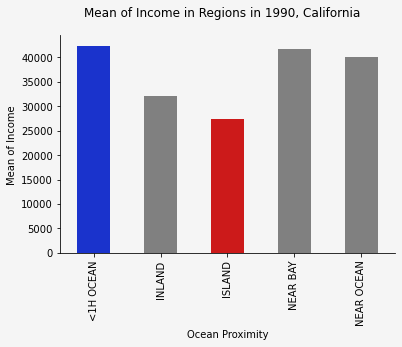

In [31]:
plt=__import__("matplotlib.pyplot")

fig, ax = plt.pyplot.subplots()

mean_ocean_df.plot(kind="bar", y="median_income", ax=ax, legend=False, color=[(0.1, 0.2, 0.8), "grey",(0.8, 0.1, 0.1), "grey", "grey"])

ax.set_facecolor((0.96, 0.96, 0.96))
fig.set_facecolor((0.96, 0.96, 0.96))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle("Mean of Income in Regions in 1990, California")
ax.set_xlabel('Ocean Proximity', fontsize =10)
ax.set_ylabel('Mean of Income', fontsize =10)

People with the highest income tended to live in a house that took less than 1 hour to go to the ocean. The people with the least income tended to live on the Island.

Text(0, 0.5, 'Mean of House Values')

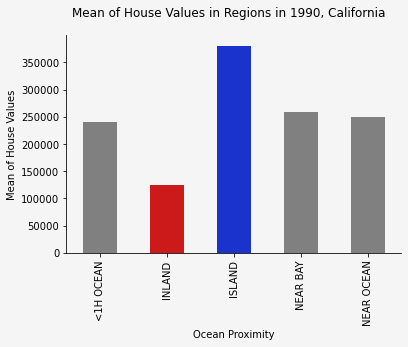

In [32]:
plt=__import__("matplotlib.pyplot")

fig, ax = plt.pyplot.subplots()

mean_ocean_df.plot(kind="bar", y='median_house_value', ax=ax, legend=False, color=["grey",(0.8, 0.1, 0.1),(0.1, 0.2, 0.8), "grey", "grey"])

ax.set_facecolor((0.96, 0.96, 0.96))
fig.set_facecolor((0.96, 0.96, 0.96))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle("Mean of House Values in Regions in 1990, California")
ax.set_xlabel('Ocean Proximity', fontsize =10)
ax.set_ylabel('Mean of House Values', fontsize =10)

However, in contrast to the previous result, the house on the island is the most expensive. People with the lowest average income were living in the house that cost the most. Also, people with the most income tend to live in one of the cheaper areas.

## Project 1 Result

Various factors played a role in the data. It was challenging to find a specific relationship between the variables considering many factors at the same time. The age of people who bought the house was spread, but there were most between 30 to 40 years old. Also, along with the age difference, there was no significant income difference, except some people's income started to fall for over 40 years old. The age group between 10-20 and 30-40 had the most capable of affording the home. However, not many people were able to afford the house according to the rule of 3. The relevant relation between the income and the house price was shown through the report.  Lastly, having a home in a valued region and the income value did not correlate. As a result, back in 1990, it was challenging to afford a house with the income. There were no relevant correlations between age and house price, but there was a moderate relationship between income and house price.

For future work, the map will be created and analyzed to find the exact relationships between the affordable houses' location and the household's income. Also, the reason for homes' affordability and how people burden house prices are not found clearly. The relationship between other variables other than just median income will be explored. It may help to find the more apparent relation if the other factors play a role. The new data set from California 1990 that can explain will be found and used. 

# Project 2

## Introduction

In project 2, the house price and income will be analyzed using the map. It will make it easier to recognize and rank different places by the colour of the map. The new graphs will be generated to show the trends of other variables. Also, the relationship between the variables will be explored more thoroughly with the numerical values. The variables with a stronger relationship will be significant, and they will be more focused on the project. 

In the project, visualizing the data will be the main focus. It will help to interpret the data more efficiently and maximize the understanding of the data.

## Part 2

### Message

So far, the relationship between income and house prices are analyzed.  The main message from the project obtained will be "The income and the prices affect the affordability of house." and "Current income relates to the value of house obtained." The relationship between the variables is still not clear, and precise answers are not yet given. However, it can be reanalyzed using visualization using more complex graphs. In this part, the main focus will be on the house's price and the income in 1990, California. 

### More Graphs

Few variables are extracted to focus on the primary data from the more extensive data set. The key variables are: "housing_median_age", "median_income", "median_house_value", "affordable_house", "affordability".

In [33]:
variables_house_df = house_df[["housing_median_age", "median_income", "median_house_value", "affordable_house", "affordability"]]
variables_house_df.head()

,housing_median_age,median_income,median_house_value,affordable_house,affordability
0,41.0,83252.0,452600.0,249756.0,Not Affordable
1,21.0,83014.0,358500.0,249042.0,Not Affordable
2,52.0,72574.0,352100.0,217722.0,Not Affordable
3,52.0,56431.0,341300.0,169293.0,Not Affordable
4,52.0,38462.0,342200.0,115386.0,Not Affordable


The non-important variables are filtered out the key factors are analyzed below. Each graph is the density line graph that indicates the rate of the variable is occupying. With these graphs, the mean and the distribution of variables are easily seen. This information will help to understand the relationship between income and house value. Since the three graphs regarding income, house values, and affordable houses have similar shapes, come relation can be expected between them. Also, the age of housing is indicated below.

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


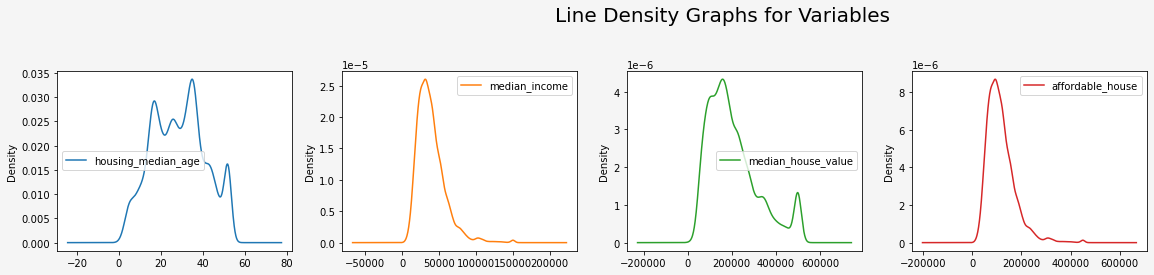

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

plt=__import__("matplotlib.pyplot")

fig, ax = plt.pyplot.subplots(figsize=(20, 30))

variables_house_df.plot(kind='density',subplots=True,layout=(10,5),sharex=False,figsize=(100,100), ax=ax)
fig.suptitle("Line Density Graphs for Variables", fontsize =20)
ax.set_facecolor((0.96, 0.96, 0.96))
fig.set_facecolor((0.96, 0.96, 0.96))
fig.tight_layout()
fig.subplots_adjust(top=0.95)

The axes are kept to make it a box to show the clear indication of each graph.

Next, the box plot is generated above. There might be outliers that may bias the mean.

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


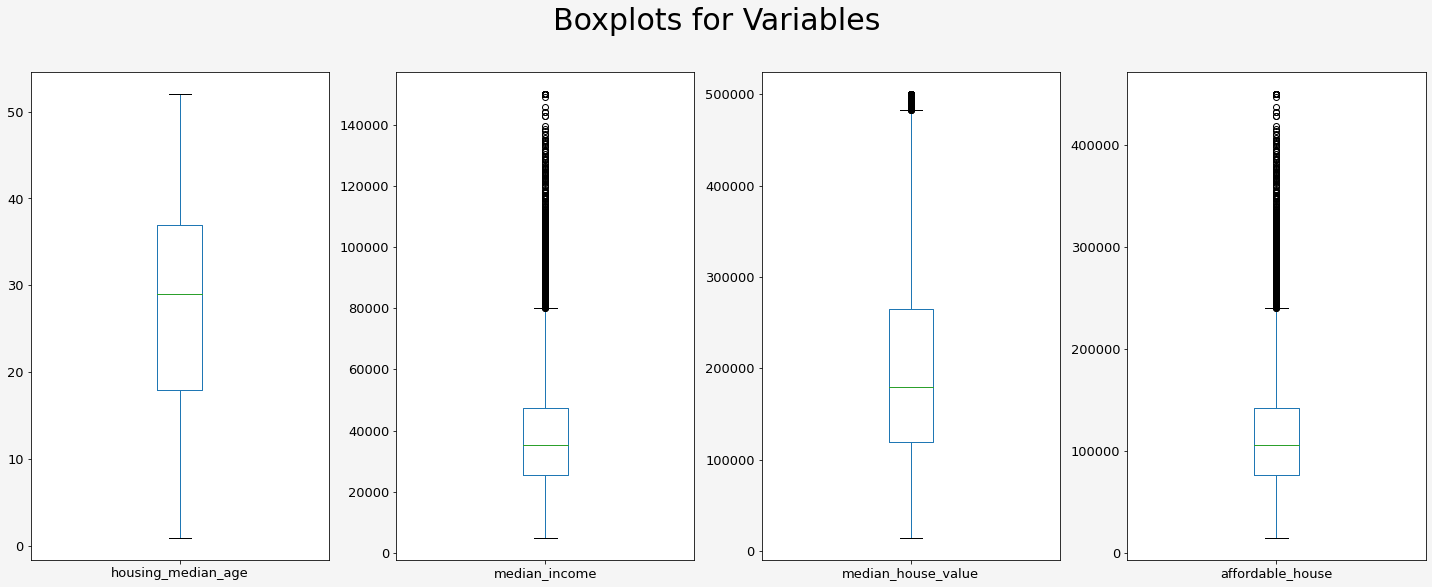

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

plt=__import__("matplotlib.pyplot")

fig, ax = plt.pyplot.subplots(figsize=(20, 30))
variables_house_df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, fontsize=13,figsize=(20,60), ax=ax)
fig.suptitle("Boxplots for Variables", fontsize =30)
ax.set_facecolor((0.96, 0.96, 0.96))
fig.set_facecolor((0.96, 0.96, 0.96))
fig.tight_layout()
fig.subplots_adjust(top=0.95)

As expected, there were lots of outliers for median income and affordable house. These factors will be considered in the future for a better analysis. Using the mean may bias the data output due to the mean. The median house value may be a better choice that does not get mainly affected by outliers. Filtering out the outlier may differ the analysis result by a lot.

### Correlation

Using the heatmap graph, the correlation between variables will be found both numerically and with respect to colours. The variables that we want to focus on are housing_median_age, median_income, median_house_value, affordable_house, and affordability.

The graph below illustrates the correlation between each variable. The saturated, or the redder the colour is, the more correlation there is. The overlapping rectangles were removed for easier understanding.

The more saturated, the higher relation there is. The box with the stronger colour will become the main focus of the study in the future part of the project. The higher the number, the higher correlation exists, meaning there is a higher chance for them to be related and control the house price as a whole.

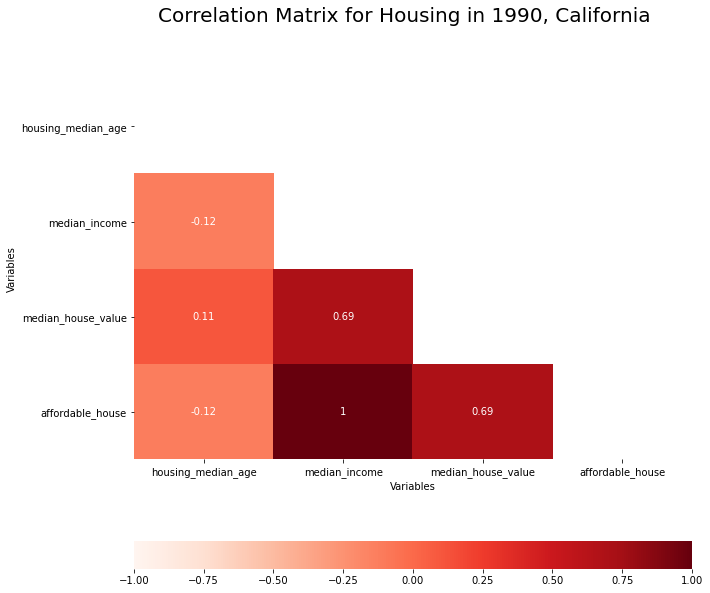

In [36]:
import seaborn as sns
import matplotlib.pylab as plt

plt.figure (figsize=(10,10))
corr = variables_house_df.corr()
matrix = np.triu(variables_house_df.corr())
sns.heatmap(corr, 
            annot = True,
            vmin=-1, vmax=1, center= 0,
            mask=matrix,
             cbar_kws= {'orientation': 'horizontal'},
            xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values,
           cmap="Reds",
           ) 

plt.xlabel("Variables")
plt.ylabel("Variables")
plt.suptitle("Correlation Matrix for Housing in 1990, California", fontsize=20)
plt.show()

From the graph, the median income and the affordable house are strongly related that the more income they earn, the higher value of affordable the home. The colour is dark and saturated. Also, the median house value and median income are moderately correlated to each other. It indicates that the higher the median income will result in the higher median house value income. Lastly, the median house value and affordable house are moderately correlated. They are moderately related that the higher median house value indicates the better able to afford the more expensive house value. The ages have weak positive to weak negative correlation to the other variables indicated by light red colour. The age range does not have a significant influence when housing. 

In project 2, part 2, new graphs were made using the same variables. The new approaches to make the graphs made the content easier to understand the interpret. The heatmap indicated the correlation between variables clearly with the numbers that the relationship between variables are discovered with numerical values. Als0, the box plots and the line graphs helped to identify the overall distribution between the variables. The outliers will be kept in mind for further analysis so that the result is not biased.

## Part 3

In part 3, the usage of a map will be the main focus. The region of the city may change the value of the house. It may be caused due to the infrastructure or the surrounding neighbourhood. The price of houses may also differ due to the school. It would be essential to examine which region has the highest house price and relate to the region's development. 

The required packages for mapping are imported below.

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline

First, the data will be converted to draw the map easily.

In [38]:
house_df = house_df.rename(columns={'longitude': 'Longitude', 'latitude': 'Latitude'})

In [39]:
house_df["Coordinates"] = list(zip(house_df.Longitude, house_df.Latitude))
house_df[["Longitude", "Latitude"]].apply(pd.to_numeric)
house_df.head()

,identification,Longitude,Latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,affordable_house,diff,affordability,Coordinates
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,NEAR BAY,249756.0,-202844.0,Not Affordable,"(-122.23, 37.88)"
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,NEAR BAY,249042.0,-109458.0,Not Affordable,"(-122.22, 37.86)"
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,NEAR BAY,217722.0,-134378.0,Not Affordable,"(-122.24, 37.85)"
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,NEAR BAY,169293.0,-172007.0,Not Affordable,"(-122.25, 37.85)"
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,NEAR BAY,115386.0,-226814.0,Not Affordable,"(-122.25, 37.85)"


In [40]:
house_df["Coordinates"] = house_df["Coordinates"].apply(Point)
house_df.head()

,identification,Longitude,Latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,affordable_house,diff,affordability,Coordinates
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,NEAR BAY,249756.0,-202844.0,Not Affordable,POINT (-122.23 37.88)
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,NEAR BAY,249042.0,-109458.0,Not Affordable,POINT (-122.22 37.86)
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,NEAR BAY,217722.0,-134378.0,Not Affordable,POINT (-122.24 37.85)
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,NEAR BAY,169293.0,-172007.0,Not Affordable,POINT (-122.25 37.85)
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,NEAR BAY,115386.0,-226814.0,Not Affordable,POINT (-122.25 37.85)


In [41]:
house_gdf = gpd.GeoDataFrame(house_df,crs = 4326, geometry= "Coordinates")

One of the states in US, California is downloaded to draw the map.

In [42]:
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")

Also, the county edges and the geometry were downloaded.

In [43]:
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
county_df.head()
county_df = county_df.query("STATEFP == '06'")

In [44]:
house_df_afford = house_df.loc[house_df['affordability'] == "Affordable"]
house_gdf_afford = gpd.GeoDataFrame(house_df_afford,crs = 4326, geometry= "Coordinates")
house_gdf_afford.head()

,identification,Longitude,Latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,affordable_house,diff,affordability,Coordinates
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,25625.0,60000.0,NEAR BAY,76875.0,16875.0,Affordable,POINT (-122.29000 37.82000)
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,33929.0,75700.0,NEAR BAY,101787.0,26087.0,Affordable,POINT (-122.29000 37.83000)
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,61183.0,75000.0,NEAR BAY,183549.0,108549.0,Affordable,POINT (-122.29000 37.82000)
64,64,-122.30,37.81,48.0,828.0,182.0,392.0,133.0,25938.0,73500.0,NEAR BAY,77814.0,4314.0,Affordable,POINT (-122.30000 37.81000)
198,198,-122.23,37.77,52.0,769.0,206.0,612.0,183.0,25700.0,72000.0,NEAR BAY,77100.0,5100.0,Affordable,POINT (-122.23000 37.77000)


### All Houses in California 1990

The mapping will be done with the county division. The county will be the address level used for the whole analysis.

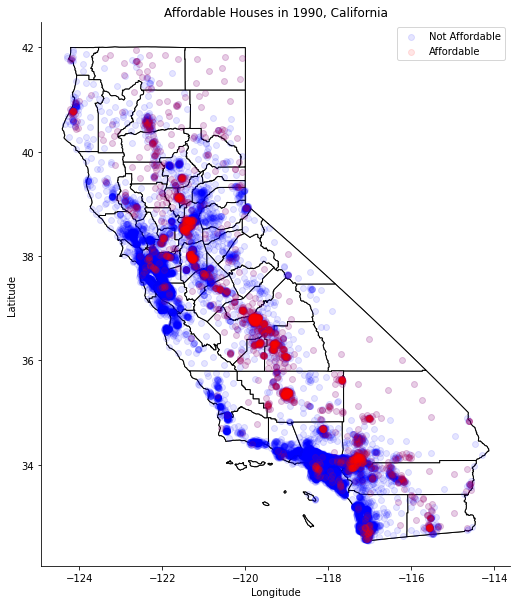

In [45]:
fig, gax = plt.subplots(figsize=(10, 10))

state_df.query("NAME == 'California'").plot(ax=gax, edgecolor="black", color="white")
county_df.plot(ax=gax, edgecolor="black", color="white")

house_gdf.plot(ax=gax, color = "blue", alpha = 0.1, label = "Not Affordable")
house_gdf_afford.plot(ax=gax, color = "red", alpha = 0.1, label = "Affordable")

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Affordable Houses in 1990, California')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# add legend
plt.legend(fontsize=10)


plt.show()

Before further analysis, the map above represents the affordable houses in California in 1990. The red dots represent the affordable houses, and the blue dots represent the unaffordable houses. From the map, the blue points occupied a larger area than the red points. It indicates that more households could not afford a home. The more saturated the colour is, the more houses are distributed in the area. The west side of California had more houses than the east side.

### Affordable Houses in Map

From the first map, the households that could affordable houses were far less than the households that could not afford the house. To figure out how they afford the house (depending on income, age, or region), only the households that afforded the house will be analyzed.

Since the given data only contain the information about the longtitude and latitude, for the region analysis, the county will be extracted from the data. The source that I referred to is: https://towardsdatascience.com/reverse-geocoding-in-python-a915acf29eb6

In [46]:
import geopy
from geopy.geocoders import Nominatim
from geopy.point import Point

In [47]:
house_df['diff'] = house_df['affordable_house'] - house_df['median_house_value']
house_df['affordability'] = np.where(house_df['diff'] > 0, "Affordable", "Not Affordable")
afford_df = house_df.loc[house_df['affordability'] == "Affordable"]
afford_df = pd.DataFrame(afford_df)
afford_df.head()

,identification,Longitude,Latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,affordable_house,diff,affordability,Coordinates
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,25625.0,60000.0,NEAR BAY,76875.0,16875.0,Affordable,POINT (-122.29000 37.82000)
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,33929.0,75700.0,NEAR BAY,101787.0,26087.0,Affordable,POINT (-122.29000 37.83000)
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,61183.0,75000.0,NEAR BAY,183549.0,108549.0,Affordable,POINT (-122.29000 37.82000)
64,64,-122.30,37.81,48.0,828.0,182.0,392.0,133.0,25938.0,73500.0,NEAR BAY,77814.0,4314.0,Affordable,POINT (-122.30000 37.81000)
198,198,-122.23,37.77,52.0,769.0,206.0,612.0,183.0,25700.0,72000.0,NEAR BAY,77100.0,5100.0,Affordable,POINT (-122.23000 37.77000)


In [48]:
import pandas as pd
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import tqdm
from tqdm.notebook import tqdm_notebook
from tqdm.auto import tqdm
tqdm.pandas()

/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


The exact address for the specific coordinates will be found using the longitude and the latitude information provided.

In [49]:
afford_df["geom"] = afford_df["Latitude"].map(str) + ',' + afford_df["Longitude"].map(str)

In [50]:
locator = Nominatim(user_agent="myGeocoder", timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)

In [51]:
afford_df["address"] = afford_df["geom"].progress_apply(rgeocode)
afford_df.head()

,identification,Longitude,Latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,affordable_house,diff,affordability,Coordinates,geom,address
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,25625.0,60000.0,NEAR BAY,76875.0,16875.0,Affordable,POINT (-122.29000 37.82000),"37.82,-122.29","(1688, 24th Street, Oakland, Alameda County, C..."
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,33929.0,75700.0,NEAR BAY,101787.0,26087.0,Affordable,POINT (-122.29000 37.83000),"37.83,-122.29","(4070, Halleck Street, Emeryville, Alameda Cou..."
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,61183.0,75000.0,NEAR BAY,183549.0,108549.0,Affordable,POINT (-122.29000 37.82000),"37.82,-122.29","(1688, 24th Street, Oakland, Alameda County, C..."
64,64,-122.30,37.81,48.0,828.0,182.0,392.0,133.0,25938.0,73500.0,NEAR BAY,77814.0,4314.0,Affordable,POINT (-122.30000 37.81000),"37.81,-122.3","(1737, 10th Street, Lower Bottoms, Oakland, Al..."
198,198,-122.23,37.77,52.0,769.0,206.0,612.0,183.0,25700.0,72000.0,NEAR BAY,77100.0,5100.0,Affordable,POINT (-122.23000 37.77000),"37.77,-122.23","(400, Lancaster Street, Fruitvale, Oakland, Al..."


In [52]:
lst = afford_df["address"].to_numpy().tolist()

In [53]:
counties = []
for address in lst:
    address_parts = address[0].split(",")
    for part in address_parts: # Check for all the counties
        if ' Alameda County' in part or ' Alpine County' in part or ' Amador County' in part or ' Butte County' in part or ' Calaveras County' in part  or ' Colusa County' in part or ' Contra Costa County' in part or ' Del Norte County' in part or ' El Dorado County' in part or ' Fresno County' in part or ' Glenn County' in part or ' Humboldt County' in part or ' Imperial County' in part or ' Inyo County' in part or ' Kern County' in part or ' Kings County' in part or ' Lake County' in part or ' Lassen County' in part or ' Los Angeles County' in part or ' Madera County' in part or ' Marin County' in part or ' Mariposa County' in part or ' Mendocino County' in part or ' Merced County' in part or ' Modoc County' in part or ' Mono County' in part or ' Monterey County' in part or ' Napa County' in part or ' Nevada County' in part or ' Orange County' in part or ' Placer County' in part or ' Plumas County' in part or ' Riverside County' in part or ' Sacramento County' in part or ' San Benito County' in part or ' San Bernardino County' in part or ' San Diego County' in part or ' San Francisco County' in part or ' San Joaquin County' in part or ' San Luis Obispo County' in part or ' San Mateo County' in part or ' Santa Barbara County' in part or ' Santa Clara County' in part or ' Santa Cruz County' in part or ' Shasta County' in part or ' Sierra County' in part or ' Siskiyou County' in part or ' Solano County' in part or ' Sonoma County' in part or ' Stanislaus County' in part or 'Sutter County' in part or ' Tehama County' in part or ' Trinity County' in part or ' Tulare County' in part or ' Tuolumne County' in part or ' Ventura County' in part or ' Yolo County' in part or ' Yuba County' in part or 'Alameda County' in part or 'Alpine County' in part or 'Amador County' in part or 'Butte County' in part or 'Calaveras County' in part  or 'Colusa County' in part or 'Contra Costa County' in part or 'Del Norte County' in part or 'El Dorado County' in part or 'Fresno County' in part or 'Glenn County' in part or 'Humboldt County' in part or 'Imperial County' in part or 'Inyo County' in part or 'Kern County' in part or 'Kings County' in part or 'Lake County' in part or 'Lassen County' in part or 'Los Angeles County' in part or 'Madera County' in part or 'Marin County' in part or 'Mariposa County' in part or 'Mendocino County' in part or 'Merced County' in part or 'Modoc County' in part or 'Mono County' in part or 'Monterey County' in part or 'Napa County' in part or 'Nevada County' in part or 'Orange County' in part or 'Placer County' in part or 'Plumas County' in part or 'Riverside County' in part or 'Sacramento County' in part or 'San Benito County' in part or 'San Bernardino County' in part or 'San Diego County' in part or 'San Francisco County' in part or 'San Joaquin County' in part or 'San Luis Obispo County' in part or 'San Mateo County' in part or 'Santa Barbara County' in part or 'Santa Clara County' in part or 'Santa Cruz County' in part or 'Shasta County' in part or 'Sierra County' in part or 'Siskiyou County' in part or 'Solano County' in part or 'Sonoma County' in part or 'Stanislaus County' in part or 'Sutter County' in part or 'Tehama County' in part or 'Trinity County' in part or 'Tulare County' in part or 'Tuolumne County' in part or 'Ventura County' in part or 'Yolo County' in part or 'Yuba County' in part or '(Alameda County' in part or '(Alpine County' in part or '(Amador County' in part or '(Butte County' in part or '(Calaveras County' in part  or '(Colusa County' in part or '(Contra Costa County' in part or '(Del Norte County' in part or '(El Dorado County' in part or '(Fresno County' in part or '(Glenn County' in part or '(Humboldt County' in part or '(Imperial County' in part or '(Inyo County' in part or '(Kern County' in part or '(Kings County' in part or '(Lake County' in part or '(Lassen County' in part or '(Los Angeles County' in part or '(Madera County' in part or '(Marin County' in part or '(Mariposa County' in part or '(Mendocino County' in part or '(Merced County' in part or '(Modoc County' in part or '(Mono County' in part or '(Monterey County' in part or '(Napa County' in part or '(Nevada County' in part or '(Orange County' in part or '(Placer County' in part or '(Plumas County' in part or '(Riverside County' in part or '(Sacramento County' in part or '(San Benito County' in part or '(San Bernardino County' in part or '(San Diego County' in part or '(San Francisco County' in part or '(San Joaquin County' in part or '(San Luis Obispo County' in part or '(San Mateo County' in part or '(Santa Barbara County' in part or '(Santa Clara County' in part or '(Santa Cruz County' in part or '(Shasta County' in part or '(Sierra County' in part or '(Siskiyou County' in part or '(Solano County' in part or '(Sonoma County' in part or '(Stanislaus County' in part or '(Sutter County' in part or '(Tehama County' in part or '(Trinity County' in part or '(Tulare County' in part or '(Tuolumne County' in part or '(Ventura County' in part or '(Yolo County' in part or '(Yuba County' in part:
            c = part.replace('(','').replace(')','').lstrip(' ').split(' ')
            counties.append(c[0])
counties_df = pd.DataFrame(counties, columns= ['counties'])
counties_df = counties_df.drop(counties_df.index[[711,713,855,1848]])

new_row = ["San"]
new_counties_df = pd.DataFrame(new_row, columns=["counties"])
counties_df = pd.concat([counties_df.iloc[:1516], new_counties_df, counties_df.iloc[1516:]], ignore_index = True)


counties_df.head()

,counties
0,Alameda
1,Alameda
2,Alameda
3,Alameda
4,Alameda


Since the data was not clean enough, I had to download the data and manually look through them if there were any error/misleading parts regarding the address. One of the trickiest parts was when the word "County" was included as a street or place name. They were found manually by comparing the address data and the county data given and were fixed.

In [54]:
afford_df['address'].to_csv('afford.csv')
counties_df.to_csv('county.csv')

In [55]:
cleaned_county_df = pd.read_csv("county_cleaned.csv")
cleaned_county_df = pd.DataFrame(cleaned_county_df)
cleaned_county_df.drop('Unnamed: 0', axis=1, inplace=True)

In [56]:
cleaned_county_df.head()

,counties
0,Alameda
1,Alameda
2,Alameda
3,Alameda
4,Alameda


Now, the counties are found from each row using the address. To map these information, it will be merged to the original data, `afford_df`.

In [57]:
afford_df = afford_df.reset_index()

In [58]:
cleaned_afford_df = pd.concat([afford_df, cleaned_county_df], axis=1)
cleaned_county_df.head()

,counties
0,Alameda
1,Alameda
2,Alameda
3,Alameda
4,Alameda


To analyze the income and house price, each variable's mean will be calculated and used to indicate each county's level. Therefore, the `median_income` indicates the mean of income, and `median_housep` indicates the mean of the house prices.

In [59]:
cleaned_afford_mean = cleaned_afford_df.groupby(['counties']).mean()
cleaned_afford_mean_income=cleaned_afford_mean['median_income']
cleaned_afford_mean_housep=cleaned_afford_mean['median_house_value']

In [60]:
cleaned_afford_mean_income= pd.DataFrame(cleaned_afford_mean_income)
cleaned_afford_mean_housep = pd.DataFrame(cleaned_afford_mean_housep)

In [61]:
cleaned_afford_mean_income = cleaned_afford_mean_income.reset_index()
cleaned_afford_mean_income.head()   

,counties,median_income
0,Alameda,35650.500000
1,Amador,40484.666667
2,Butte,26497.727273
3,Calaveras,31250.000000
4,Colusa,27009.666667


In [62]:
cleaned_afford_mean_housep = cleaned_afford_mean_housep.reset_index()
cleaned_afford_mean_housep.head()

,counties,median_house_value
0,Alameda,83721.428571
1,Amador,114100.000000
2,Butte,68530.303030
3,Calaveras,77500.000000
4,Colusa,69200.000000


The afford data is cleaned, and the houses' county is found from the address and merged. The mapping can be done with this data. Also, the mean of income and house price of each county was calculated to simplify the data.

This is the original map of California divided into counties.

In [63]:
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
county_df = county_df.query("STATEFP == '06'")

In [64]:
county_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
33,06,083,00277306,0500000US06083,06083,Santa Barbara,06,7084000598,2729814515,"MULTIPOLYGON (((-119.06002 33.49165, -119.0303..."
84,06,091,00277310,0500000US06091,06091,Sierra,06,2468694587,23299110,"POLYGON ((-121.05820 39.53704, -121.04745 39.5..."
169,06,069,00277299,0500000US06069,06069,San Benito,06,3596755292,4555000,"POLYGON ((-121.64400 36.89400, -121.62946 36.9..."
170,06,061,00277295,0500000US06061,06061,Placer,06,3644333049,246486852,"POLYGON ((-121.48444 38.75135, -121.46980 38.7..."
200,06,019,00277274,0500000US06019,06019,Fresno,06,15433177265,135374444,"POLYGON ((-120.65595 36.95283, -120.59057 36.9..."


In [65]:
cleaned_afford_mean_housep["counties"] = cleaned_afford_mean_housep["counties"].str.title()
cleaned_afford_mean_housep["counties"] = cleaned_afford_mean_housep["counties"].str.strip()
county_df["NAME"] = county_df["NAME"].str.title()
county_df["NAME"] = county_df["NAME"].str.strip()

In [66]:
cleaned_afford_mean_income["counties"] = cleaned_afford_mean_income["counties"].str.title()
cleaned_afford_mean_income["counties"] = cleaned_afford_mean_income["counties"].str.strip()
county_df["NAME"] = county_df["NAME"].str.title()
county_df["NAME"] = county_df["NAME"].str.strip()

In [67]:
str.title(" aBc d")

' Abc D'

In [68]:
str.strip(" Abc D")

'Abc D'

The income and the house price data frames are each merged to the county data frame.

In [69]:
cleaned_afford_mean_income = county_df.merge(cleaned_afford_mean_income, left_on="NAME", right_on="counties", how="inner")
cleaned_afford_mean_income.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,counties,median_income
0,06,083,00277306,0500000US06083,06083,Santa Barbara,06,7084000598,2729814515,"MULTIPOLYGON (((-119.06002 33.49165, -119.0303...",Santa Barbara,28624.200000
1,06,091,00277310,0500000US06091,06091,Sierra,06,2468694587,23299110,"POLYGON ((-121.05820 39.53704, -121.04745 39.5...",Sierra,31619.750000
2,06,061,00277295,0500000US06061,06061,Placer,06,3644333049,246486852,"POLYGON ((-121.48444 38.75135, -121.46980 38.7...",Placer,55294.666667
3,06,019,00277274,0500000US06019,06019,Fresno,06,15433177265,135374444,"POLYGON ((-120.65595 36.95283, -120.59057 36.9...",Fresno,34586.000000
4,06,105,00277317,0500000US06105,06105,Trinity,06,8234265201,73407949,"POLYGON ((-123.62026 40.93155, -123.60956 40.9...",Trinity,25421.125000


In [70]:
cleaned_afford_mean_housep = county_df.merge(cleaned_afford_mean_housep, left_on="NAME", right_on="counties", how="inner")
cleaned_afford_mean_housep.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,counties,median_house_value
0,06,083,00277306,0500000US06083,06083,Santa Barbara,06,7084000598,2729814515,"MULTIPOLYGON (((-119.06002 33.49165, -119.0303...",Santa Barbara,65980.000
1,06,091,00277310,0500000US06091,06091,Sierra,06,2468694587,23299110,"POLYGON ((-121.05820 39.53704, -121.04745 39.5...",Sierra,74100.000
2,06,061,00277295,0500000US06061,06061,Placer,06,3644333049,246486852,"POLYGON ((-121.48444 38.75135, -121.46980 38.7...",Placer,155700.000
3,06,019,00277274,0500000US06019,06019,Fresno,06,15433177265,135374444,"POLYGON ((-120.65595 36.95283, -120.59057 36.9...",Fresno,84550.000
4,06,105,00277317,0500000US06105,06105,Trinity,06,8234265201,73407949,"POLYGON ((-123.62026 40.93155, -123.60956 40.9...",Trinity,57362.375


The affordable information data and the mapping information are merged into one data frame.

### Median Income of each County

Since the goal is to analyze how many of each county's households can afford the house, the income will be compared.

First, the number of households that could afford the house will be analyzed.

In [71]:
cleaned_county_df = cleaned_county_df['counties'].value_counts() 
cleaned_county_df.head()

Fresno            268
Kern              208
San Bernardino    199
Tulare            137
Sacramento        136
Name: counties, dtype: int64

Most households that could afford a house were from Fresno. The least households were from Calaveras, Napa, Santa Cruz, Marin, and Monterey.  

Now, the income of the households will be mapped using different colours. If the colour is bluer and saturated, the higher the income will be.

To find the range of the colour map, the maximum and minimum values were calculated.

In [72]:
income_max = cleaned_afford_mean_income["median_income"].max()
income_max

150001.0

In [73]:
income_min = cleaned_afford_mean_income["median_income"].min()
income_min

16779.666666666668

In [74]:
cleaned_afford_mean_income = gpd.GeoDataFrame(cleaned_afford_mean_income)

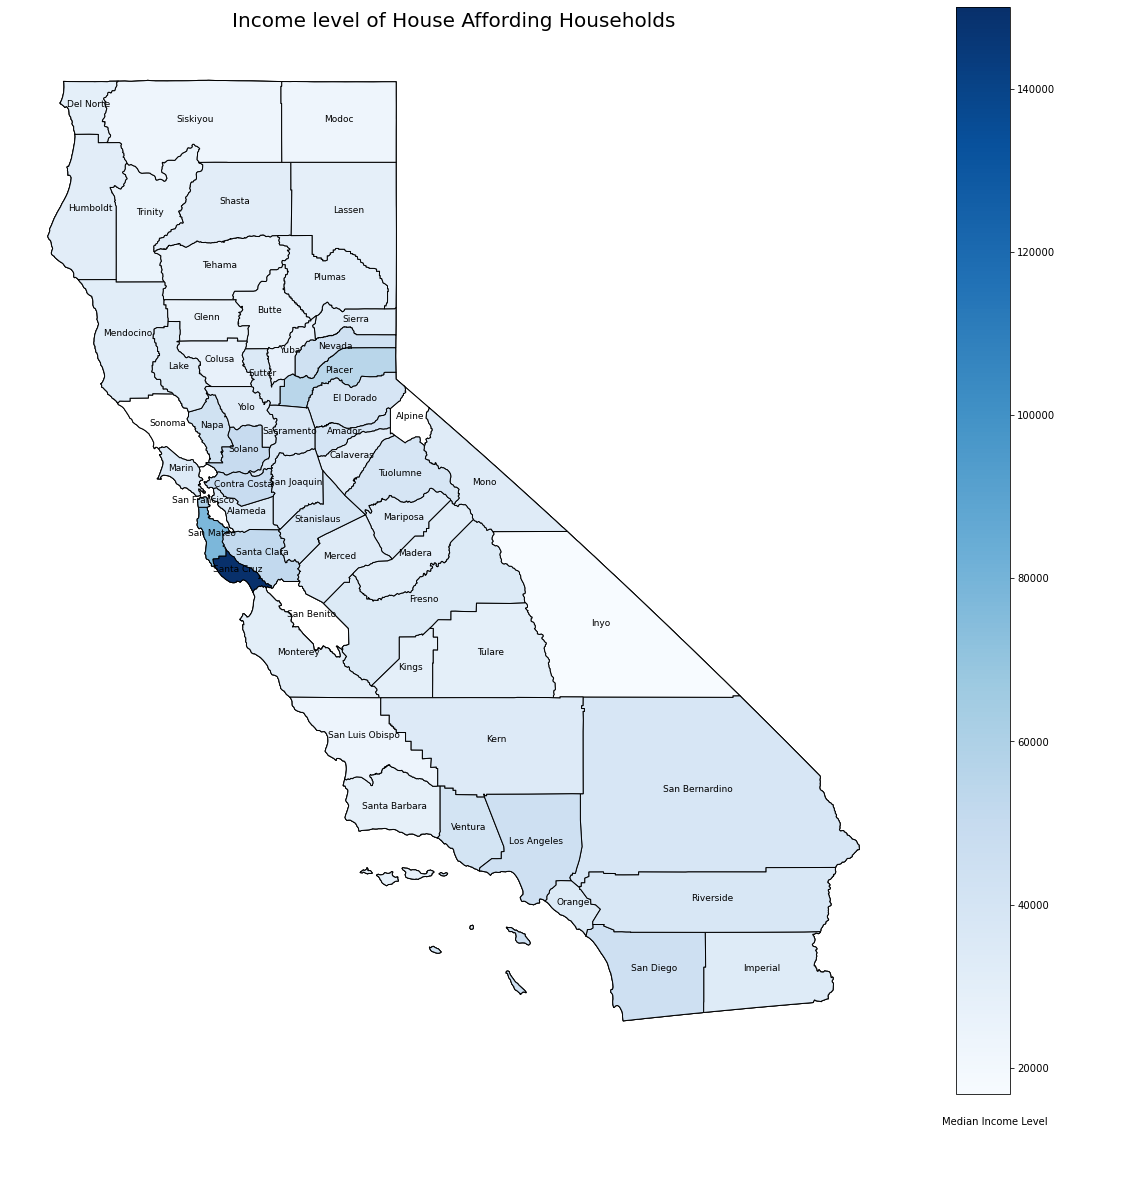

In [75]:
fig, gax = plt.subplots(figsize = (20,20))

# Plot the state
state_df[state_df['NAME'] == 'California'].plot(ax = gax, edgecolor='black',color='white')
county_df.plot(ax=gax, edgecolor="black", color="white")

cleaned_afford_mean_income.plot(
    ax=gax, edgecolor='black', column='median_income', legend=True, cmap='Blues',
    vmin=income_min, vmax= income_max
)

# add a title
gax.set_title('Income level of House Affording Households', fontdict={'fontsize': 20, 'fontweight' : 3})

gax.annotate('Median Income Level',xy=(0.83, 0.06),  xycoords='figure fraction')


plt.axis('off')

county_df.apply(lambda x: gax.annotate(text=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=9, fontweight=3),axis=1);    

plt.show()

The map indicates that households living in "Santa Cruz" had the most income. The complete white spaces did not have any people who were able to afford the house. The least income was earned in Inyo. The rest of the regions had small or did not have a significant difference. Then, since they had more income, does that mean that they bought more expensive houses? 

### Median House Price of each County

The next map will indicate the median house prices. It will show the distribution of house prices of the household that could afford houses. The redder and more saturated the colour is, the more expensive the house was.

In [76]:
cleaned_afford_mean_housep.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,counties,median_house_value
0,06,083,00277306,0500000US06083,06083,Santa Barbara,06,7084000598,2729814515,"MULTIPOLYGON (((-119.06002 33.49165, -119.0303...",Santa Barbara,65980.000
1,06,091,00277310,0500000US06091,06091,Sierra,06,2468694587,23299110,"POLYGON ((-121.05820 39.53704, -121.04745 39.5...",Sierra,74100.000
2,06,061,00277295,0500000US06061,06061,Placer,06,3644333049,246486852,"POLYGON ((-121.48444 38.75135, -121.46980 38.7...",Placer,155700.000
3,06,019,00277274,0500000US06019,06019,Fresno,06,15433177265,135374444,"POLYGON ((-120.65595 36.95283, -120.59057 36.9...",Fresno,84550.000
4,06,105,00277317,0500000US06105,06105,Trinity,06,8234265201,73407949,"POLYGON ((-123.62026 40.93155, -123.60956 40.9...",Trinity,57362.375


In [77]:
housep_max = cleaned_afford_mean_housep["median_house_value"].max()
housep_max

400000.0

In [78]:
housep_min = cleaned_afford_mean_housep["median_house_value"].min()
housep_min

31133.0

In [79]:
cleaned_afford_mean_housep = gpd.GeoDataFrame(cleaned_afford_mean_housep)

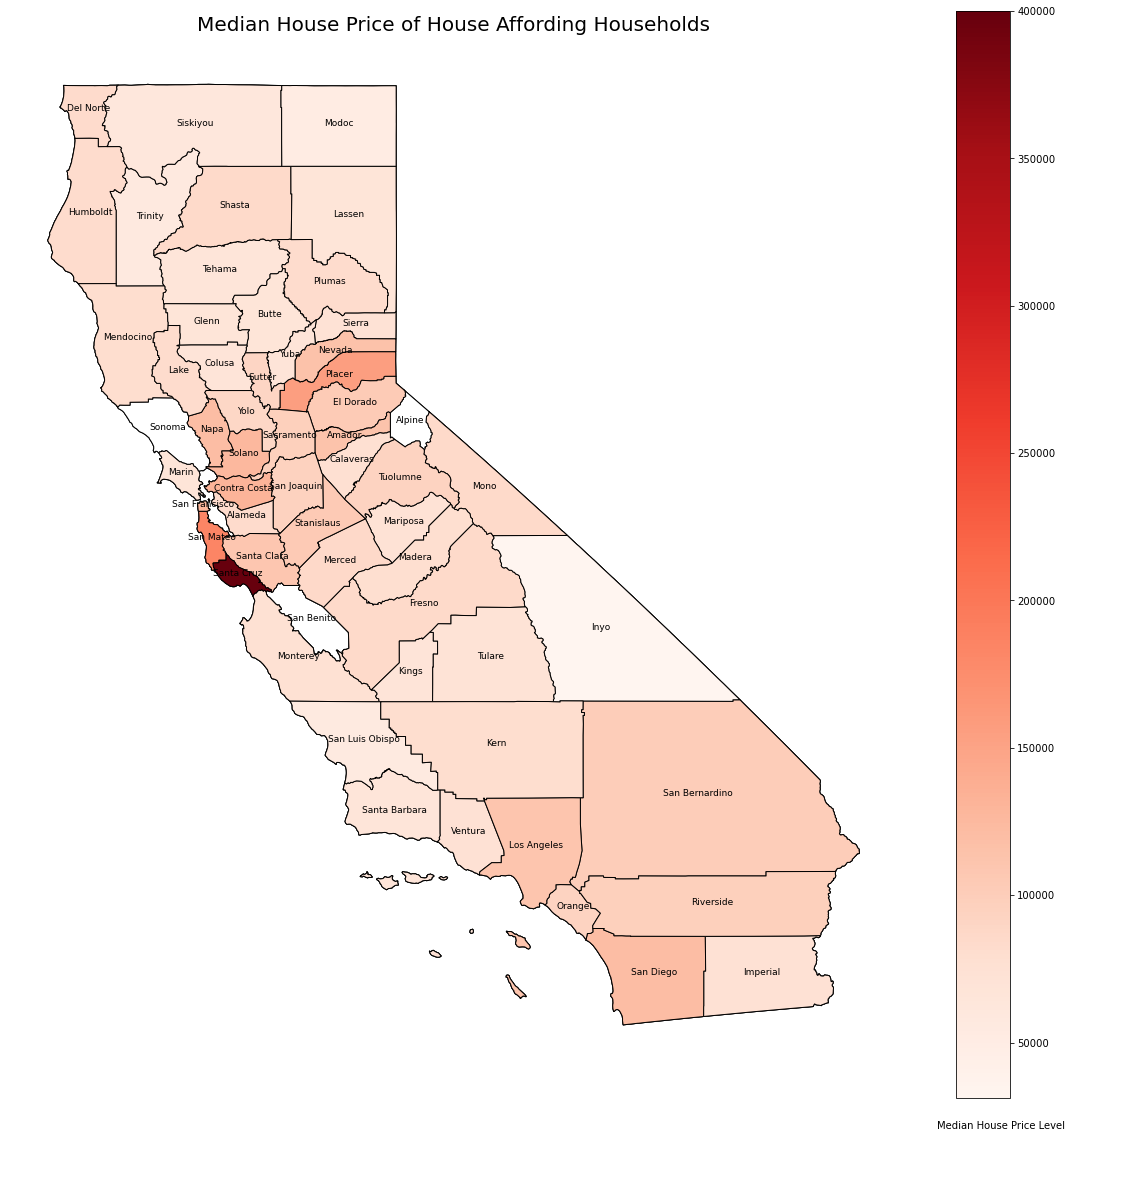

In [80]:
fig, gax = plt.subplots(figsize = (20,20))

# Plot the state
state_df[state_df['NAME'] == 'California'].plot(ax = gax, edgecolor='black',color='white')
county_df.plot(ax=gax, edgecolor="black", color="white")

cleaned_afford_mean_housep.plot(
    ax=gax, edgecolor='black', column='median_house_value', legend=True, cmap='Reds',
    vmin=housep_min, vmax= housep_max 
)

# add a title
gax.set_title('Median House Price of House Affording Households', fontdict={'fontsize': 20, 'fontweight' :3})

gax.annotate('Median House Price Level',xy=(0.82, 0.06),  xycoords='figure fraction')

plt.axis('off')

county_df.apply(lambda x: gax.annotate(text=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=9, fontweight=3),axis=1);    

plt.show()

The result shows that the house prices were mostly high in Santa Cruz. The complete white spaces did not have any households who were able to afford a house. The least expensive houses were in Inyo County.

The result explains that the house price and the income was positively related. The households who could earn more could afford more expensive houses, and the lower-income families could only afford cheaper houses. Both colour saturation and colour distribution were similar from the map, indicating they are directly proportional to each variable.

## Project 2 Conclusion

From project 2, the results are getting closer to the answer to the project message. From project 2, the main relation found was the correlation between the median house price and the median income. The correlation was numerically calculated and gave the value, 0.69, which is a moderate relation. The map's saturation indicated that the higher income has resulted in the more expensive house. The affordable households were mainly focused on project 2.

In the future, the data will be filtered more carefully. From project part 2, some outliers could have biased the result, as the box plots have shown. The future project may include the filtered and more cleaned data to see how the result may differ. Also, the other variables were relatively neglected in project 2. The later project may put more focus on the other variables as well to find new relations.

# Project 3

## Part 2

### Part 2 Introduction

Naturally, all the markets in the world do not flow smoothly. Due to the external effects, the markets tend to fluctuate, and the quantity of demand and supply tends to change. In the housing market, one of the significant factors of fluctuation is due to the natural disaster. The natural catastrophe causes lots of fluctuations for households, such as unemployment and house affordability. The houses that are hit by the earthquake will also face a decrease in value. It may eventually lead to economic shock and recession if the factors affected do not go back to the normal condition. One of the largest Earthquakes, the Loma Prieta earthquake, occurred in 1989 and caused many casualties. It would be a significant factor that caused the house prices to change. In this part of the project, the external factor's effect, natural disaster earthquake, will be explored.

#### Web Scrapping

#### Scrapped Data 1

First, before moving on to the specific topic, house price, the California earthquake's general effects will be analyzed. The information is from `The Economic Consequences of a Catastrophic Earthquake: Proceedings of a Forum (https://www.nap.edu/read/2027/chapter/7)`. The data is obtained from web-scraping. The data is about the general economic impact focused on the employment and income brought after the Loma Prieta Earthquake. 

From this data, the message is that the earthquake may hit the economy strongly. It will show how the economic index decreased after the earthquake occurred in California. It is essential while the housing market tends to shift in the same direction as the other goods. If the other goods' demand decrease, the housing demand may tend to decrease. The overall economic index before and after the earthquake will be scraped and analyzed by comparing how they differ. It will help identify the apparent effect of the temporary shock to the economy in California in 1990.

##### Message

The data collecting is the result of the change in the economic index from 1990. Therefore, the data will not be changed, while this is the past result that can not be updated. It does not have to be generated frequently. The only case that will require regenerating is when the site changes the format of the data. It would be adequate to check and run your program over time once a year.

##### Challenge

Before collecting the data, the table that was desired was checked. The challenge of web-scrapping the data is that there were blank spaces in the table. The columns were not consistent when the element of the table was inspected. One column was included in the other larger column, which made it confusing to extract the required information. Obtaining only the required data may be a big challenge.

In [81]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [82]:
unemployment_equake_url = "https://www.nap.edu/read/2027/chapter/7"
response = requests.get(unemployment_equake_url)

The data on the website can be successfully scrapped. Next, BeautifulSoup() method will be used to obtain a soup object which will give structured information.

In [83]:
soup_object = BeautifulSoup(response.content)

The `table` is the keyword to search since we are interested in finding the information in the table. The first table on the web page is the information desired.

In [84]:
data_table = soup_object.find_all('table')[0]

In [85]:
all_values = data_table.find_all('tr')

The data element with `tr` are distinguished and found. The data will is separated by row to make it easier to read. Each index represents the row with the content.

The data required for the analysis is web scraped from the table on the website. Rather than copying and pasting, it is an efficient way to get the required information.

Web-scrapping steps

The data is extracted in a loop while the structure of the elements was the same. First, the empty data frame econindex_equake_df will be created with the column names '','OCT', and 'OCT'. Then, the index will be initiated to zero to start from the first row. The loop created will go through all the elements of the list in order. It will extract the economic index in each city and each period. The loop will look for the < p > HTML tag. The find_all() function will return a list of `p` tags. The .text will be used to pick the text part from the tag. They will pick Area, OCT, and OCT2. Lastly, to remove `\n` at the end of the extracted data, rstrip() will be used. The values collected will be put into the data frame, and the index value will be incremented. 

In [86]:
econindex_equake_df = pd.DataFrame(columns = ['','OCT','OCT']) 
ix = 0

for row in all_values[1:]:
    values = row.find_all('p')
    Area = values[0].text.rstrip()
    OCT = values[1].text.rstrip()
    OCT2 = values[2].text.rstrip() 
    econindex_equake_df.loc[ix] = [Area, OCT, OCT2]
    ix += 1

In [87]:
econindex_equake_df.columns = ['Area','Before Earthquake', 'After Earthquake']
econindex_equake_df = econindex_equake_df.drop(econindex_equake_df.index[[0, 5]])
econindex_equake_df = econindex_equake_df.reset_index()
econindex_equake_df = econindex_equake_df.drop('index', 1)
econindex_equake_df

,Area,Before Earthquake,After Earthquake
0,San Francisco Area*,3.2,2.9
1,Oakland Area**,4.2,3.7
2,Santa Cruz County,5.1,4.7
3,San Benito County,10.1,9.3




The data obtained is a composite index number involving six different variables, including real estate, the services sector, the retail sales sector, tourism, trade, and manufacturing. The change was observed within a month after the earthquake. As observed, the overall economic activities were decreased slightly. People will tend to use less money and the overall markets will tend to slow down.

In [88]:
econindex_equake_df['Before Earthquake'] = pd.to_numeric(econindex_equake_df['Before Earthquake'])
econindex_equake_df['After Earthquake'] = pd.to_numeric(econindex_equake_df['After Earthquake'])

Text(0, 0.5, 'Economic Index')

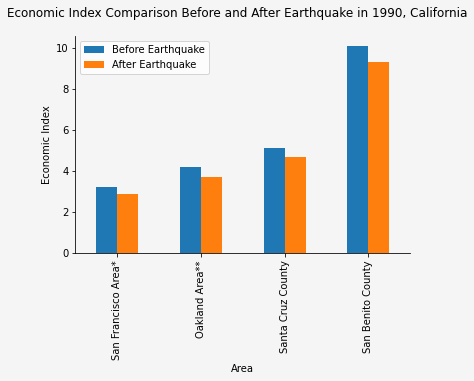

In [89]:
plt=__import__("matplotlib.pyplot")

fig, ax = plt.pyplot.subplots()

econindex_equake_df.plot(x="Area", y=["Before Earthquake", "After Earthquake"], ax=ax, kind="bar")

ax.set_facecolor((0.96, 0.96, 0.96))
fig.set_facecolor((0.96, 0.96, 0.96))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle("Economic Index Comparison Before and After Earthquake in 1990, California")
ax.set_xlabel('Area', fontsize =10)
ax.set_ylabel('Economic Index', fontsize =10)

According to the graph, the red bars indicate the economic index after the earthquake, and the blue bars indicate the index before the earthquake. The difference in index level can be seen easily using the visualization of a bar graph.

In [90]:
econindex_equake_df['Difference of Index'] = econindex_equake_df['After Earthquake'] - econindex_equake_df['Before Earthquake']
econindex_equake_df

,Area,Before Earthquake,After Earthquake,Difference of Index
0,San Francisco Area*,3.2,2.9,-0.3
1,Oakland Area**,4.2,3.7,-0.5
2,Santa Cruz County,5.1,4.7,-0.4
3,San Benito County,10.1,9.3,-0.8


Text(0, 0.5, 'Difference of Economic Index')

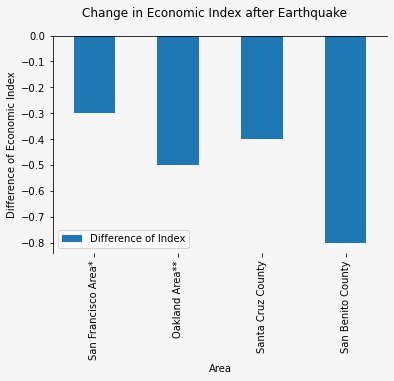

In [91]:
plt=__import__("matplotlib.pyplot")

fig, ax = plt.pyplot.subplots()

econindex_equake_df.plot(x="Area", y=["Difference of Index"], ax=ax, kind="bar")

ax.set_facecolor((0.96, 0.96, 0.96))
fig.set_facecolor((0.96, 0.96, 0.96))
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
fig.suptitle("Change in Economic Index after Earthquake")
ax.set_xlabel('Area', fontsize =10)
ax.set_ylabel('Difference of Economic Index', fontsize =10)

The bar graph indicates that San Benito County had the most change after the earthquake. The blue colour is used to indicate the decreasing observation. Keeping this observed fact in mind, the earthquake data in California in 1989 and 1990 will be monitored more thoroughly to interpret the quake's impact on the house price directly. In the next section, the earthquake's location and the magnitude will be found through web-scrapping to see the house price correlation later in the project. While the index, including the income, was decreased, the housing affordability and the price might have fluctuated.

##### Next Steps

However, this index does not show a direct effect on house prices. Therefore, for further study, the direct impact of the earthquake in the housing market is required. With additional data from web-scraping, the location of the epicentre of the quake will be found and used to compare it with the house price.

#### Scraped Data 2

The earthquake data in California is required to show how the house price was affected. The data will be web-scrapped from the source, `SOCR Data 021708 Earthquakes (http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_021708_Earthquakes)`, to collect the required information about the occurred year and the earthquake's magnitude. Also, the location will be required to find where the earthquake occurred. It will help to see if the nearer place to the earthquake gets more affected by it. The data will help to find the significance of earthquakes. 

The data collecting is the record of the past earthquake epicentre. The data will not be changed, while this is the past record that cannot be alternated. Therefore, it does not have to be generated frequently. The only case that will require regenerating is when the site changes the format of the data. It would be adequate to check and run your program over time once a year.

##### Message

If the income of the household is zero, they can buy the house that is `$8978.3864` in theory. However, it will be challenging to buy a house that is cheap as the intercept. Therefore, interpreting the intercept may cause bias. It would be better to ignore the intuition of the y-intercept.

##### Challenge

The challenge would be some unnecessary columns, and rows need to be filtered. It will be essential to clean the data after the web scrap. It will be too complicated to gather the required data from the data set.

In [92]:
earthquake_url = "http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_021708_Earthquakes"
response = requests.get(earthquake_url)

The data on the website can be successfully scrapped.

In [93]:
soup_object = BeautifulSoup(response.content)

The website scrapping's response content is passed to a BeautifulSoup() method to obtain a thoroughly structured soup object. Next, the `table` will be used as the keyword to search because we are interested in finding the information in the table.

In [94]:
data_table = soup_object.find_all('table')[2]

The table wanted is found on the web. `tr` will be found to observe the column name and cells. It is the process of checking if we have the desired information.

In [95]:
all_values = data_table.find_all('tr')

The data required for the analysis is web scraped from the table on the website. Rather than copying and pasting, it is an efficient way to get the required information.

Web-scrapping steps

The data is extracted in a loop while the structure of the elements was the same. First, the empty data frame `earthquake_df` will be created with the column names 'Date_(YYYY/MM/DD)', 'Latitude', 'Longitude', and 'Mag'. Then, the index will be initiated to zero to start from the first row. The loop created will go through all the elements of the list in order. It will extract the economic index in each city and each period. The loop will look for the < td > HTML tag. The find_all() function will return a list of `td` tags. The .text will be used to pick the text part from the tag. They will pick Date, Latitude, Longitude, and Mag. Lastly, to remove `\n` at the end of the extracted data, rstrip() will be used. The values collected will be put into the data frame, `earthquake_df`, and incremented the index value. 

In [96]:
earthquake_df = pd.DataFrame(columns = ['Date_(YYYY/MM/DD)', 'Latitude', 'Longitude', 'Mag']) 
ix = 0 

for row in all_values[1:]:
    values = row.find_all('td')
    Date = values[0].text.rstrip() 
    Latitude = values[2].text.rstrip() 
    Longitude = values[3].text.rstrip() 
    Mag = values[5].text.rstrip() 
    earthquake_df.loc[ix] = [Date, Latitude, Longitude, Mag] 
    ix += 1
    
earthquake_df.head()

,Date_(YYYY/MM/DD),Latitude,Longitude,Mag
0,1969/10/02,38.4978,-122.6640,5.60
1,1969/10/02,38.4500,-122.7535,5.70
2,1972/02/24,36.5903,-121.1905,5.10
3,1974/11/28,36.9202,-121.4673,5.20
4,1975/06/07,40.5415,-124.2763,5.30


The primary focus of the data is in 1990. Therefore, the data analyzed will be the earthquakes in 1989 (the year before the main data) and 1990 because the impact will be shown after the earthquake and will not clear out fast. To cover-up, it will require time because it is an unexpected shock. 

In [97]:
earthquake_90_df = earthquake_df.loc[95:104].reset_index()

All data values are changed into a numerical values. It is helpful when comparing, graphing or calculating another value.

In [98]:
earthquake_90_df = earthquake_90_df.drop('index', 1)
earthquake_90_df['Latitude'] = pd.to_numeric(earthquake_90_df['Latitude'])
earthquake_90_df['Longitude'] = pd.to_numeric(earthquake_90_df['Longitude'])
earthquake_90_df['Mag'] = pd.to_numeric(earthquake_90_df['Mag'])

earthquake_90_df

,Date_(YYYY/MM/DD),Latitude,Longitude,Mag
0,1989/01/19,33.8533,-118.6612,5.3
1,1989/03/03,35.7743,-124.2902,5.0
2,1989/08/08,37.1482,-121.9268,5.4
3,1989/10/18,37.0362,-121.8798,7.0
4,1989/10/18,37.1902,-122.0520,5.1
5,1990/01/16,40.2425,-124.2975,5.4
6,1990/02/28,34.3758,-118.2000,6.2
7,1990/04/18,36.9323,-121.6568,5.4
8,1990/04/18,36.9588,-121.6845,5.1
9,1990/10/24,38.0618,-119.1192,5.8


All the information required is found from the external source, `SOCR Data 021708 Earthquakes`. Now, the data will be analyzed. The process of mapping is similar to the project 2 part.

In [99]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline

In [100]:
earthquake_90_df["Coordinates"] = list(zip(earthquake_90_df.Longitude, earthquake_90_df.Latitude))
earthquake_90_df

,Date_(YYYY/MM/DD),Latitude,Longitude,Mag,Coordinates
0,1989/01/19,33.8533,-118.6612,5.3,"(-118.6612, 33.8533)"
1,1989/03/03,35.7743,-124.2902,5.0,"(-124.2902, 35.7743)"
2,1989/08/08,37.1482,-121.9268,5.4,"(-121.9268, 37.1482)"
3,1989/10/18,37.0362,-121.8798,7.0,"(-121.8798, 37.0362)"
4,1989/10/18,37.1902,-122.0520,5.1,"(-122.052, 37.1902)"
5,1990/01/16,40.2425,-124.2975,5.4,"(-124.2975, 40.2425)"
6,1990/02/28,34.3758,-118.2000,6.2,"(-118.2, 34.3758)"
7,1990/04/18,36.9323,-121.6568,5.4,"(-121.6568, 36.9323)"
8,1990/04/18,36.9588,-121.6845,5.1,"(-121.6845, 36.9588)"
9,1990/10/24,38.0618,-119.1192,5.8,"(-119.1192, 38.0618)"


In [101]:
earthquake_90_df["Coordinates"] = earthquake_90_df["Coordinates"].apply(Point)
earthquake_90_df

,Date_(YYYY/MM/DD),Latitude,Longitude,Mag,Coordinates
0,1989/01/19,33.8533,-118.6612,5.3,POINT (-118.6612 33.8533)
1,1989/03/03,35.7743,-124.2902,5.0,POINT (-124.2902 35.7743)
2,1989/08/08,37.1482,-121.9268,5.4,POINT (-121.9268 37.1482)
3,1989/10/18,37.0362,-121.8798,7.0,POINT (-121.8798 37.0362)
4,1989/10/18,37.1902,-122.0520,5.1,POINT (-122.052 37.1902)
5,1990/01/16,40.2425,-124.2975,5.4,POINT (-124.2975 40.2425)
6,1990/02/28,34.3758,-118.2000,6.2,POINT (-118.2 34.3758)
7,1990/04/18,36.9323,-121.6568,5.4,POINT (-121.6568 36.9323)
8,1990/04/18,36.9588,-121.6845,5.1,POINT (-121.6845 36.9588)
9,1990/10/24,38.0618,-119.1192,5.8,POINT (-119.1192 38.0618)


In [102]:
earthquake_gdf = gpd.GeoDataFrame(earthquake_90_df,crs = 4326, geometry= "Coordinates")
earthquake_gdf

,Date_(YYYY/MM/DD),Latitude,Longitude,Mag,Coordinates
0,1989/01/19,33.8533,-118.6612,5.3,POINT (-118.66120 33.85330)
1,1989/03/03,35.7743,-124.2902,5.0,POINT (-124.29020 35.77430)
2,1989/08/08,37.1482,-121.9268,5.4,POINT (-121.92680 37.14820)
3,1989/10/18,37.0362,-121.8798,7.0,POINT (-121.87980 37.03620)
4,1989/10/18,37.1902,-122.0520,5.1,POINT (-122.05200 37.19020)
5,1990/01/16,40.2425,-124.2975,5.4,POINT (-124.29750 40.24250)
6,1990/02/28,34.3758,-118.2000,6.2,POINT (-118.20000 34.37580)
7,1990/04/18,36.9323,-121.6568,5.4,POINT (-121.65680 36.93230)
8,1990/04/18,36.9588,-121.6845,5.1,POINT (-121.68450 36.95880)
9,1990/10/24,38.0618,-119.1192,5.8,POINT (-119.11920 38.06180)


In [103]:
state_gdf = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
state_gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"MULTIPOLYGON (((-133.65582 55.62562, -133.6249..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
3,08,01779779,0400000US08,08,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
4,09,01779780,0400000US09,09,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."


In [104]:
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
county_df.head()
county_df = county_df.query("STATEFP == '06'")
county_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
33,06,083,00277306,0500000US06083,06083,Santa Barbara,06,7084000598,2729814515,"MULTIPOLYGON (((-119.06002 33.49165, -119.0303..."
84,06,091,00277310,0500000US06091,06091,Sierra,06,2468694587,23299110,"POLYGON ((-121.05820 39.53704, -121.04745 39.5..."
169,06,069,00277299,0500000US06069,06069,San Benito,06,3596755292,4555000,"POLYGON ((-121.64400 36.89400, -121.62946 36.9..."
170,06,061,00277295,0500000US06061,06061,Placer,06,3644333049,246486852,"POLYGON ((-121.48444 38.75135, -121.46980 38.7..."
200,06,019,00277274,0500000US06019,06019,Fresno,06,15433177265,135374444,"POLYGON ((-120.65595 36.95283, -120.59057 36.9..."


The epicentre for each Earthquake is marked. The blue stars indicated the earthquakes in 1989 and 1990. This information will be applied to the house price. The examination will be done to observe how the cost of the house change after the Earthquake. The data is too complicated to merge and compared directly. Instead, by creating another map, the maps will be compared visually by overlapping the map.

The map indicates that the earthquake occurred the most in Santa Cruz and Santa Clara county. Few happened in the ocean, which left side of California. There was one strong earthquake with a magnitude of 6.2 in Los Angeles and Mono with 5.8.

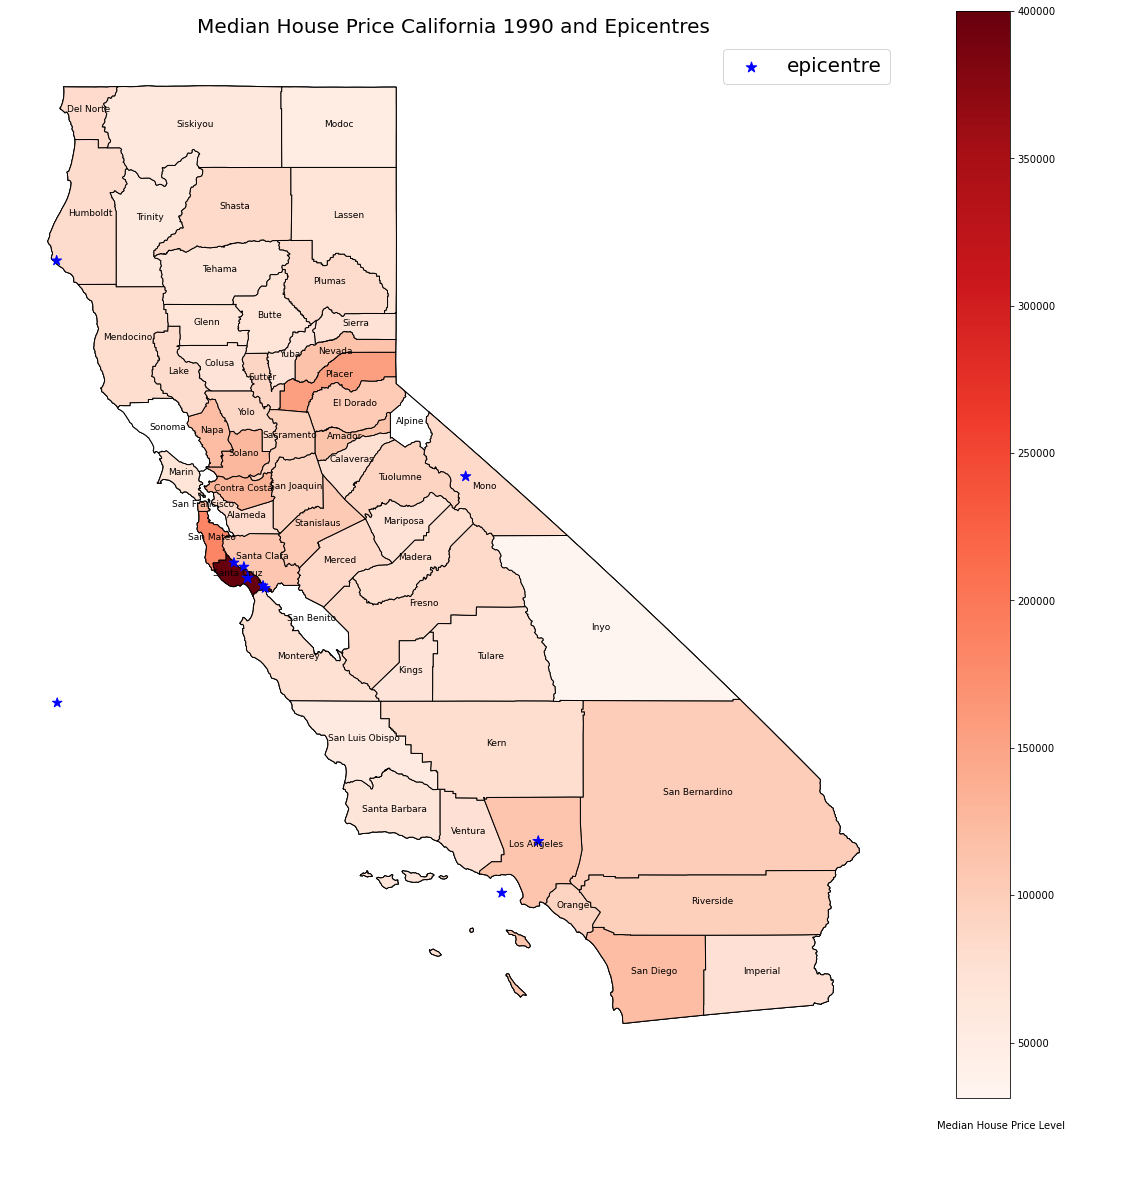

In [105]:
fig, gax = plt.subplots(figsize = (20,20))

state_df[state_df['NAME'] == 'California'].plot(ax = gax, edgecolor='black',color='white')
county_df.plot(ax=gax, edgecolor="black", color="white")

cleaned_afford_mean_housep.plot(
    ax=gax, edgecolor='black', column='median_house_value', legend=True, cmap='Reds',
    vmin=housep_min, vmax= housep_max 
)

earthquake_gdf.plot(ax=gax, marker='*', color = "blue", markersize=earthquake_gdf['Mag']*20, label = "epicentre")


gax.set_title('Median House Price California 1990 and Epicentres', fontdict={'fontsize': 20, 'fontweight' :3})

gax.annotate('Median House Price Level',xy=(0.82, 0.06),  xycoords='figure fraction')

plt.axis('off')

plt.legend(fontsize=20)

county_df.apply(lambda x: gax.annotate(text=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=9, fontweight=3),axis=1);    

plt.show()

Comparing the location of the star and the colour of the map of each region, it is visible that the area where the earthquake occurred is where the most expensive houses are located. Usually, after the earthquake, house prices tend to decrease. The people do not want to take the risk of buying a home that had experienced the earthquake. The houses that experience the earthquake have weaker pillars and damaged bases. People avoid buying the damaged house because it is costly to repair. Also, they fear that the earthquake may occur again near the region. Therefore, after the earthquake, the houses are usually cheaper while the demand is low. Then, after few years, the house price tends to rise back. It is essential to look at the timeline of the house price after and before the earthquake when considering the overall house price trend.

However, in California, the houses near the epicentres were more expensive. Does it mean that people who are rich in the place where the epicentre is likely to locate? Or do they just have the ability to have another price? In contrast to the first observation, houses in California's midland, where the Earthquake epicentre did not occur, were mid-priced to mid-high priced rather than cheap. It indicates that there might be other factors that control the house price. There might be other factors such as infrastructure or school. Therefore, it is hard to claim that the earthquake directly affects house prices, while clear evidence does not exist from the limited data.

The only point that can be understood is that the rich people can afford the expensive house follow the permanent-income hypothesis rather than the borrowing-constrained hypothesis. They are allowed to sustain the damage to the home because their consumption is spread out. The marginal propensity of consumption of temporary shock is low. It means that while they have enough money, the use of money due to the shock will not make them very poor. They can repair the house after the earthquake without the significant shock in consumption. Since they fixed the house, the value of the house can be sustained and highly-priced even after the quake.

##### Future Studies

In future studies, the other factors should also be studied. There might be more substantial evidence that the places near the epicentre are more expensive. First, further examination is required if the current data is biased. More datasets may help to reduce the bias. Then, if there is no strong evidence that this data is biased, find a new factor to merge and compare. For example, if the infrastructure is more available, people may tend to live disregard the earthquake. The workplace, school, market and other essential places may be placed near the expensive region. Therefore, further study can develop a more apparent reason for the expensive house price disregarding earthquake risk.

## Part 3

## Part 3 Introduction

Until now, the data that were used were all from 1990. Between the recent days and back then, how did the house pricing features were different? It is essential to compare today's information and the past to interpret the study more thoroughly. It will give a hint of how the future will look like from the pattern and trend. Also, it helps to identify the problem and help how government should work to improve the utility and quality of the housing market from an economic perspective.

The new data will be obtained from `FRED`, which provides the household incomes of California from 1989 to 2019. Also, the house price will be obtained from 2016 to 2021. They will be used to show the trends for each category. The timeline is relevant while they can help to predict the future prices and incomes. The growth of the income and house prices will help the government and economists to develop new policies. From the trend, three scenarios can be found. The first is when the growth of the house price is faster than the income. It will cause difficulty for many households to buy a house. Second, the growth of house prices may be slower than the income growth. People will have a less difficult time purchasing a home. However, there might be the competition that may bring the house price up again. Lastly, if the income and house price growth rates are similar, the future will be similar to the housing market in 1990.

Therefore, it is necessary to analyze the growth in a different timeline to predict and prepare for the future.

### Merging Data

The data below is the cleaned primary data frame that has been used for this project. The new data frame will be merged into the existing data frame for comparison. The first variable that will be compared will be the household's mean income that could afford the house.

The required columns are the counties and the median income. Therefore, they will be left on the current dataframe.

#### Original Data

In [106]:
mean_afford_income = cleaned_afford_mean_income[['NAME', 'median_income']]
mean_afford_income.head()

,NAME,median_income
0,Santa Barbara,28624.200000
1,Sierra,31619.750000
2,Placer,55294.666667
3,Fresno,34586.000000
4,Trinity,25421.125000


In [107]:
mean_afford_income.columns = ['County','1990']
mean_afford_income.head()

,County,1990
0,Santa Barbara,28624.200000
1,Sierra,31619.750000
2,Placer,55294.666667
3,Fresno,34586.000000
4,Trinity,25421.125000


Before merging new data, the name should be changed to make the data clearer to distinguish the data from the unknown variables.

Now, the new data from the external source will be merged. The data is obtained from `FRED`, which is the source that provides economic data. The annual median income is measured in dollars, not seasonally adjusted.

#### New Data

In [108]:
header_list = ["County", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]
median_income_new = pd.read_csv("Income Data.csv", names=header_list)
median_income_new.head()

,County,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
County,NaN,1989-01-01,1990-01-01,1991-01-01,1992-01-01,1993-01-01,1994-01-01,1995-01-01,1996-01-01,1997-01-01,...,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01
Alameda,NaN,34732,NaN,NaN,NaN,40324,NaN,44653,NaN,46795,...,66937,67295,70209,72128,76996,81462,89472,95550,101744,107589
Alpine,NaN,25097,NaN,NaN,NaN,26259,NaN,28492,NaN,31080,...,44241,46706,46336,49392,53003,50882,57481,55755,55384,58112
Amador,NaN,27592,NaN,NaN,NaN,32588,NaN,35647,NaN,37829,...,49516,51553,51388,52357,54610,55879,59789,60588,58515,62640
Butte,NaN,22122,NaN,NaN,NaN,24828,NaN,28229,NaN,29367,...,41168,39208,40748,42395,42302,45369,45097,48634,50945,58394


The data obtained will be cleaned to make it easier to interpret and merge to the primary data.

In [109]:
median_income_new = median_income_new.drop('County', 1)
median_income_new = median_income_new.drop(median_income_new.index[[0]])
median_income_new.head()

,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Alameda,34732,NaN,NaN,NaN,40324,NaN,44653,NaN,46795,48445,...,66937,67295,70209,72128,76996,81462,89472,95550,101744,107589
Alpine,25097,NaN,NaN,NaN,26259,NaN,28492,NaN,31080,31444,...,44241,46706,46336,49392,53003,50882,57481,55755,55384,58112
Amador,27592,NaN,NaN,NaN,32588,NaN,35647,NaN,37829,39610,...,49516,51553,51388,52357,54610,55879,59789,60588,58515,62640
Butte,22122,NaN,NaN,NaN,24828,NaN,28229,NaN,29367,30464,...,41168,39208,40748,42395,42302,45369,45097,48634,50945,58394
Calaveras,27056,NaN,NaN,NaN,30191,NaN,32696,NaN,34672,37366,...,50745,50599,50962,52598,53321,52471,57990,58536,62984,68248


The `NaN` is not helpful and unnecessary. Therefore, they will be removed from the data.

In [110]:
median_income_new = median_income_new.dropna(axis='columns')
median_income_new.head()

,1989,1993,1995,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Alameda,34732,40324,44653,46795,48445,51298,55551,54925,55595,56225,...,66937,67295,70209,72128,76996,81462,89472,95550,101744,107589
Alpine,25097,26259,28492,31080,31444,35654,39640,38401,37691,38825,...,44241,46706,46336,49392,53003,50882,57481,55755,55384,58112
Amador,27592,32588,35647,37829,39610,40177,42701,41805,43628,44494,...,49516,51553,51388,52357,54610,55879,59789,60588,58515,62640
Butte,22122,24828,28229,29367,30464,30536,31963,31342,32124,33528,...,41168,39208,40748,42395,42302,45369,45097,48634,50945,58394
Calaveras,27056,30191,32696,34672,37366,38971,41460,40890,42563,43462,...,50745,50599,50962,52598,53321,52471,57990,58536,62984,68248


Since all the cells were in `str`, string value, it needs to be converted to numerical value for the graphs and calculations.

In [111]:
cols = median_income_new.columns
median_income_new[cols] = median_income_new[cols].apply(pd.to_numeric, errors='coerce')

Using the obtained data, it will be merged to the original data using the county. Then, the result will give the trend of income by comparing the current years. Before merging, the index of `median_income_new` should be reset to make a county column.

In [112]:
median_income_new.reset_index(level=0, inplace=True)
median_income_new = median_income_new.rename(columns={'index': 'County'})
median_income_new.head()

,County,1989,1993,1995,1997,1998,1999,2000,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alameda,34732,40324,44653,46795,48445,51298,55551,54925,55595,...,66937,67295,70209,72128,76996,81462,89472,95550,101744,107589
1,Alpine,25097,26259,28492,31080,31444,35654,39640,38401,37691,...,44241,46706,46336,49392,53003,50882,57481,55755,55384,58112
2,Amador,27592,32588,35647,37829,39610,40177,42701,41805,43628,...,49516,51553,51388,52357,54610,55879,59789,60588,58515,62640
3,Butte,22122,24828,28229,29367,30464,30536,31963,31342,32124,...,41168,39208,40748,42395,42302,45369,45097,48634,50945,58394
4,Calaveras,27056,30191,32696,34672,37366,38971,41460,40890,42563,...,50745,50599,50962,52598,53321,52471,57990,58536,62984,68248


Now, the data is cleaned and ready to be merged. The merge method will be `inner` because having the full information is easier to analyze with the complete data from both data frames. Having `NaN` may cause problems when graphing, which it is better to remove first before further analysis.

In [113]:
median_income_df = pd.merge(mean_afford_income, median_income_new, on= 'County', how='inner')
median_income_df = median_income_df.dropna(axis='columns')
median_income_df = median_income_df.dropna(axis='rows')
median_income_df.head()

,County,1990,1989,1993,1995,1997,1998,1999,2000,2001,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Santa Barbara,28624.200000,32500,36169,36889,40232,42806,43211,46908,46279,...,56243,59494,60683,60803,62116,63049,66360,70651,75646,74530
1,Sierra,31619.750000,25954,28839,31012,34941,37685,36329,37770,36679,...,42800,45060,45157,46449,47293,47535,48099,49495,52308,55862
2,Placer,55294.666667,35182,40663,46687,49638,52572,55539,59153,58577,...,68330,69581,69521,73643,75689,76203,85326,81366,89175,97688
3,Fresno,34586.000000,25075,27613,30984,31587,32023,32576,34930,34020,...,44869,42572,41563,43741,43338,46608,48323,51452,52318,56926
4,Trinity,25421.125000,22865,23807,25173,27042,27816,27692,28752,27464,...,35207,33163,35162,35708,34961,37669,38727,40676,40680,43881


### Analysis

 A bar graph for median income will be used for visualization to read the overall trend. Then, the linear regression will be used for further prediction (assuming no economic shock).

There are more than 50 counties. Rather than analyzing all the data, the most critical data will be selected and focused on studying. The highest and the lowest difference data between 2019 and 1990 will be used.

In [114]:
median_income_df["Income Difference"] = median_income_df["2019"] - median_income_df["1990"]
median_income_df.head()

,County,1990,1989,1993,1995,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Income Difference
0,Santa Barbara,28624.200000,32500,36169,36889,40232,42806,43211,46908,46279,...,59494,60683,60803,62116,63049,66360,70651,75646,74530,45905.800000
1,Sierra,31619.750000,25954,28839,31012,34941,37685,36329,37770,36679,...,45060,45157,46449,47293,47535,48099,49495,52308,55862,24242.250000
2,Placer,55294.666667,35182,40663,46687,49638,52572,55539,59153,58577,...,69581,69521,73643,75689,76203,85326,81366,89175,97688,42393.333333
3,Fresno,34586.000000,25075,27613,30984,31587,32023,32576,34930,34020,...,42572,41563,43741,43338,46608,48323,51452,52318,56926,22340.000000
4,Trinity,25421.125000,22865,23807,25173,27042,27816,27692,28752,27464,...,33163,35162,35708,34961,37669,38727,40676,40680,43881,18459.875000


In [115]:
median_income_df[median_income_df['Income Difference']==median_income_df['Income Difference'].max()]

,County,1990,1989,1993,1995,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Income Difference
17,Santa Clara,52077.583333,44316,49795,53490,59639,63298,68619,74705,72869,...,84741,91195,91843,97219,102191,110843,118468,125933,132444,80366.416667


In [116]:
median_income_df[median_income_df['Income Difference']==median_income_df['Income Difference'].min()]

,County,1990,1989,1993,1995,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Income Difference
29,Santa Cruz,150001.0,30892,36100,40596,44607,45267,49095,53787,52984,...,61228,65799,65282,64257,64841,75929,76633,84213,85770,-64231.0


In [117]:
median_income_df['Income Difference'].nsmallest(4)

29   -64231.000
31    14156.100
4     18459.875
14    18602.000
Name: Income Difference, dtype: float64

In [118]:
median_income_df[median_income_df.index.isin([14])]

,County,1990,1989,1993,1995,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Income Difference
14,Mariposa,34158.0,22238,26723,29339,31178,32760,33286,35151,34192,...,42175,43166,45251,47781,44595,51233,52387,51402,52760,18602.0


The highest difference was in Santa Clara, with a difference of 80366.42 dollars. However, the smallest difference seems to have a problem that it is highly biased. The income in 1990 is significantly large compared to 1989 and 1993 that it does not make sense. It could have happened from the primary data because it did not have enough information for the whole population. As explained in the previous parts, the data could have been biased. The second and third smallest cannot be used because it does not have house prices in the later data. Therefore, instead of using biased data, it would be better to get the fourth smallest income in a different county in California between 1990 and 2019. The fourth-smallest was Mariposa County, with a difference of $18602.0. 

The data frame should be transposed to make counties as columns and the year as the index for graphing. That way, it is easier to visualize the data on the graph. For the transpose, the `Income Difference` must be drop to avoid confusion. The is unnecessary anymore.

In [119]:
median_income_df = median_income_df.drop('Income Difference', 1)
median_income_df = median_income_df.set_index('County').T #Transpose
median_income_df = median_income_df.reset_index()
median_income_df.head()

County,index,Santa Barbara,Sierra,Placer,Fresno,Trinity,San Bernardino,Monterey,Tehama,El Dorado,...,Tuolumne,San Francisco,Kern,Yolo,Siskiyou,Sacramento,Madera,Modoc,Contra Costa,Glenn
0,1990,28624.2,31619.75,55294.666667,34586.0,25421.125,38405.768844,30437.0,26448.25,39643.75,...,39267.4,60391.5,34023.908654,33219.583333,23022.9,37181.375,31388.1,23016.428571,48843.517241,26300.133333
1,1989,32500.0,25954.00,35182.000000,25075.0,22865.000,30550.000000,29417.0,21236.00,32954.00,...,25463.0,30166.0,26614.000000,27781.000000,22077.0,30024.000,23150.0,21788.000000,41955.000000,21847.000000
2,1993,36169.0,28839.00,40663.000000,27613.0,23807.000,34397.000000,33375.0,24159.00,38180.00,...,29304.0,34623.0,29372.000000,32471.000000,24072.0,35388.000,26905.0,24316.000000,47609.000000,24416.000000
3,1995,36889.0,31012.00,46687.000000,30984.0,25173.000,35725.000000,34461.0,26314.00,42658.00,...,31462.0,37854.0,32183.000000,35620.000000,26429.0,36642.000,31644.0,25124.000000,53055.000000,26293.000000
4,1997,40232.0,34941.00,49638.000000,31587.0,27042.000,36876.000000,38341.0,28030.00,44954.00,...,33810.0,43405.0,32359.000000,38751.000000,28178.0,39461.000,30804.0,28174.000000,54275.000000,28649.000000


In [120]:
median_income_df = median_income_df.rename(columns={'index': 'Year'})
median_income_df["Year"] = pd.to_numeric(median_income_df["Year"])
median_income_df.head()

County,Year,Santa Barbara,Sierra,Placer,Fresno,Trinity,San Bernardino,Monterey,Tehama,El Dorado,...,Tuolumne,San Francisco,Kern,Yolo,Siskiyou,Sacramento,Madera,Modoc,Contra Costa,Glenn
0,1990,28624.2,31619.75,55294.666667,34586.0,25421.125,38405.768844,30437.0,26448.25,39643.75,...,39267.4,60391.5,34023.908654,33219.583333,23022.9,37181.375,31388.1,23016.428571,48843.517241,26300.133333
1,1989,32500.0,25954.00,35182.000000,25075.0,22865.000,30550.000000,29417.0,21236.00,32954.00,...,25463.0,30166.0,26614.000000,27781.000000,22077.0,30024.000,23150.0,21788.000000,41955.000000,21847.000000
2,1993,36169.0,28839.00,40663.000000,27613.0,23807.000,34397.000000,33375.0,24159.00,38180.00,...,29304.0,34623.0,29372.000000,32471.000000,24072.0,35388.000,26905.0,24316.000000,47609.000000,24416.000000
3,1995,36889.0,31012.00,46687.000000,30984.0,25173.000,35725.000000,34461.0,26314.00,42658.00,...,31462.0,37854.0,32183.000000,35620.000000,26429.0,36642.000,31644.0,25124.000000,53055.000000,26293.000000
4,1997,40232.0,34941.00,49638.000000,31587.0,27042.000,36876.000000,38341.0,28030.00,44954.00,...,33810.0,43405.0,32359.000000,38751.000000,28178.0,39461.000,30804.0,28174.000000,54275.000000,28649.000000


The graph below indicates the income growth of Santa Clara over approximately 30 years. Even with slight fluctuations, the income has been growing since 1989.

[-4945575.22611458]
[[2506.53479508]]


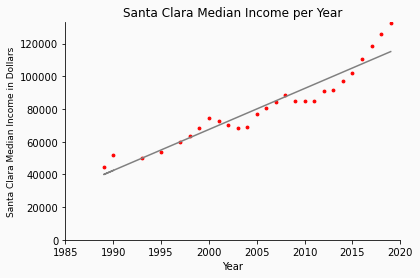

In [121]:
plt=__import__("matplotlib.pyplot")

fig, ax = plt.pyplot.subplots()
median_income_df.plot(kind="scatter", x="Year", y="Santa Clara", ax=ax, s=8, color="Red")

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)
ax.set_xlim(1985, 2020)
ax.set_ylim(0, 133000)
ax.title.set_text('Santa Clara Median Income per Year')
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Santa Clara Median Income in Dollars', fontsize=9)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

lr = LinearRegression()
x = median_income_df["Year"].values.reshape(-1, 1)
y = median_income_df["Santa Clara"].values.reshape(-1, 1) 

lr.fit(x, y)
y_pred = lr.predict(x)
ax.plot(x, y_pred, color="grey")

print(lr.intercept_)
print(lr.coef_)

From the result, the linear regression model was found. The linear regression equation can be written as `y = 2506.53x - 4945575.23`, where y is the income of Santa Clara and x is the year. While the slope is positive, the median is growing each year. This equation can help approximately identify the future income of Santa Clara. It will usually work without any economic shocks, such as rapid increase or decrease from tax rate change. As an example, the income after 10 years, which is 2031, can be predicted.

In [122]:
year = 2031
Income = 2506.53 * year -4945575.23
Income

145187.2000000002

The predicted median income is that income will be close to 145187.20 dollars in 2031, Santa Clara.

Similar steps will be done for `Mariposa` data. It had the minimum difference between 1990 and 2019.

[-1735372.2512253]
[[885.04261755]]


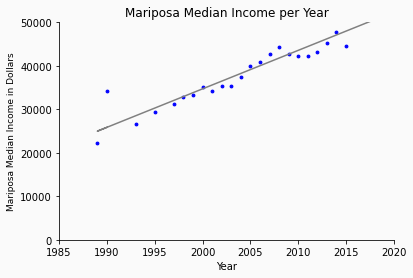

In [123]:
plt=__import__("matplotlib.pyplot")

fig, ax = plt.pyplot.subplots()
median_income_df.plot(kind="scatter", x="Year", y="Mariposa", ax=ax, s=8, color="Blue")

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)
ax.set_xlim(1985, 2020)
ax.set_ylim(0, 50000)
ax.title.set_text('Mariposa Median Income per Year')
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Mariposa Median Income in Dollars', fontsize=9)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

lr = LinearRegression()
x = median_income_df["Year"].values.reshape(-1, 1)
y = median_income_df["Mariposa"].values.reshape(-1, 1) 

lr.fit(x, y)
y_pred = lr.predict(x)
ax.plot(x, y_pred, color="grey")

print(lr.intercept_)
print(lr.coef_)

The linear regression line is `y = 885.04x -1735372.25`. where y is the income of Mariposa and x is the year. While the slope is positive, the median is growing each year.  This equation can help approximately identify the future income of Mariposa. The outlier existed in 1990, but it can occur and can also have occurred due to the lack of data variation from our primary data. The income in 2031 can be predicted using the linear regression line.

In [124]:
year = 2031
Income = 885.04*year -1735372.25
Income

62143.98999999999

The income in 2031 is predicted to be $47826.47 in Trinity.

Now, using the data obtained, the house price prediction will also be made. The data used for house price is from the `prnewswire` and `California Association of Realtors (CAR)`. The data were separated with a complexity that some manual adjustments were made.

In [125]:
header_list = ["County", "1989", "2016", "2017", "2018", "2019", "2020", "2021"]
median_price_new = pd.read_csv("Calif House price.csv", names=header_list)
median_price_new.head()

,County,1989,2016,2017,2018,2019,2020,2021
0,NaN,NaN,2016,2017,2018.0,2019,2020,2021
1,Alameda,NaN,828000,862000,NaN,881500,1060000,1100000
2,Contra Costa,NaN,595000,653000,NaN,665000,763000,817500
3,Marin,NaN,1237500,1315000,NaN,1300000,1459000,1540000
4,Napa,NaN,645770,673250,NaN,765000,842000,931500


A cleaning process is required to merge the data to the original data. The process is similar to the income data. The non-existing rows will be deleted for efficient analysis. Also, all the cells will be changed into a numeric value for calculations and graphing.

In [126]:
median_price_new = median_price_new.drop(median_price_new.index[[0]])
median_price_new = median_price_new.dropna(axis='columns')
median_price_new.head()

,County,2016,2017,2019,2020,2021
1,Alameda,828000,862000,881500,1060000,1100000
2,Contra Costa,595000,653000,665000,763000,817500
3,Marin,1237500,1315000,1300000,1459000,1540000
4,Napa,645770,673250,765000,842000,931500
5,San Francisco,1360000,1501680,1450000,1581000,1786400


In [127]:
median_price_new = median_price_new.set_index('County')
median_price_new.head()

,2016,2017,2019,2020,2021
County,,,,,
Alameda,828000,862000,881500,1060000,1100000
Contra Costa,595000,653000,665000,763000,817500
Marin,1237500,1315000,1300000,1459000,1540000
Napa,645770,673250,765000,842000,931500
San Francisco,1360000,1501680,1450000,1581000,1786400


In [128]:
cols = median_price_new.columns
median_price_new[cols] = median_price_new[cols].apply(pd.to_numeric, errors='coerce')
median_price_new = median_price_new.reset_index()
median_price_new.head()

,County,2016,2017,2019,2020,2021
0,Alameda,828000,862000,881500,1060000,1100000
1,Contra Costa,595000,653000,665000,763000,817500
2,Marin,1237500,1315000,1300000,1459000,1540000
3,Napa,645770,673250,765000,842000,931500
4,San Francisco,1360000,1501680,1450000,1581000,1786400


In [129]:
mean_afford_house = cleaned_afford_mean_housep[['NAME', 'median_house_value']]
mean_afford_house.columns = ['County','1990']
mean_afford_house.head()

,County,1990
0,Santa Barbara,65980.000
1,Sierra,74100.000
2,Placer,155700.000
3,Fresno,84550.000
4,Trinity,57362.375


The primary data that we have will be cleaned as well to only select the required data for this analysis.

Now, both of the data frames are cleaned and ready to be merged. It will be merged to cleaned_afford_mean_housep. The method inner will be used to only extract values that both data frames have.

In [130]:
median_price_df = pd.merge(mean_afford_house, median_price_new, on= 'County', how = 'inner')
median_price_df = median_price_df.dropna(axis='columns')
median_price_df = median_price_df.dropna(axis='rows')
median_price_df.head()

,County,1990,2016,2017,2019,2020,2021
0,Santa Barbara,65980.000000,689000,725000,770000,970000,1174080
1,Placer,155700.000000,427000,460000,495000,559000,599500
2,Fresno,84550.000000,232000,250000,285000,325000,350000
3,San Bernardino,101497.487437,245080,272200,320000,378500,389900
4,Monterey,76600.000000,540000,617000,613250,785000,820000


For consistency, the same counties will be used from the previous analysis rather than having new counties. It will help to compare later in the project. Therefore, the house price difference will be analyzed for `Santa Clara`, and `Mariposa`.

For graphing, the row and column should be transposed. The years will be the row, and the counties will become the row name.

In [131]:
median_price_df = median_price_df.set_index('County').T #Transpose
median_price_df = median_price_df.reset_index()
median_price_df = median_price_df.rename(columns={'index': 'Year'})
median_price_df.head()

County,Year,Santa Barbara,Placer,Fresno,San Bernardino,Monterey,Tehama,Nevada,Kings,San Luis Obispo,...,Stanislaus,Tuolumne,San Francisco,Lake,Kern,Yolo,Sacramento,Madera,Contra Costa,Glenn
0,1990,65980.0,155700.0,84550.0,101497.487437,76600.0,66741.666667,116066.666667,69030.909091,56150.0,...,106003.846154,93540.0,128750.0,81927.777778,80131.25,89783.333333,98831.617647,78985.0,131696.551724,67426.6
1,2016,689000.0,427000.0,232000.0,245080.000000,540000.0,270000.000000,235000.000000,215000.000000,540000.0,...,265000.000000,242500.0,1360000.0,354000.000000,225000.00,398000.000000,317950.000000,213500.0,595000.000000,175000.0
2,2017,725000.0,460000.0,250000.0,272200.000000,617000.0,289500.000000,283000.000000,211000.000000,569000.0,...,290000.000000,299000.0,1501680.0,389000.000000,230000.00,453450.000000,342100.000000,255000.0,653000.000000,200000.0
3,2019,770000.0,495000.0,285000.0,320000.000000,613250.0,237500.000000,400000.000000,255000.000000,615500.0,...,335000.000000,292000.0,1450000.0,271500.000000,262900.00,441000.000000,385000.000000,285100.0,665000.000000,252000.0
4,2020,970000.0,559000.0,325000.0,378500.000000,785000.0,273250.000000,508000.000000,281750.000000,711000.0,...,380000.000000,330000.0,1581000.0,306950.000000,300000.00,515000.000000,442250.000000,335000.0,763000.000000,297500.0


The required information is selected from the dataset to make it easier to visualize.

In [132]:
median_price_Santa_df = median_price_df[['Year', 'Santa Clara']]
cols = median_price_Santa_df.columns
median_price_Santa_df[cols] = median_price_Santa_df[cols].apply(pd.to_numeric, errors='coerce')
median_price_Santa_df

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


County,Year,Santa Clara
0,1990,108975.0
1,2016,1100000.0
2,2017,1200000.0
3,2019,1225000.0
4,2020,1375000.0
5,2021,1486250.0


In [133]:
median_price_Mariposa_df = median_price_df[['Year', 'Mariposa']]
cols = median_price_Mariposa_df.columns
median_price_Mariposa_df[cols] = median_price_Mariposa_df[cols].apply(pd.to_numeric, errors='coerce')
median_price_Mariposa_df

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


County,Year,Mariposa
0,1990,73300.0
1,2016,225000.0
2,2017,285000.0
3,2019,299900.0
4,2020,380000.0
5,2021,397500.0


Now, the data is cleaned up and ready to graph. The graph below is the house price of Santa Clara graph depending on the year. Unlike the previous data, there is a limited source of information that the fewer years are observed.

[-82619217.48747914]
[[41563.39732888]]


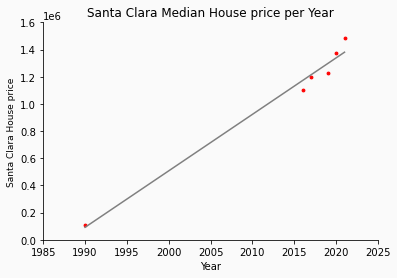

In [134]:
plt=__import__("matplotlib.pyplot")

fig, ax = plt.pyplot.subplots()
median_price_Santa_df .plot(kind="scatter", x="Year", y="Santa Clara", ax=ax, s=8, color="Red")

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)
ax.set_xlim(1985, 2025)
ax.set_ylim(0, 1600000)
ax.title.set_text('Santa Clara Median House price per Year')
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Santa Clara House price', fontsize=9)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

lr = LinearRegression()
x = median_price_Santa_df ["Year"].values.reshape(-1, 1)
y = median_price_Santa_df ["Santa Clara"].values.reshape(-1, 1) 

lr.fit(x, y)
y_pred = lr.predict(x)
ax.plot(x, y_pred, color="grey")

print(lr.intercept_)
print(lr.coef_)

From the result, the linear regression model of median house price was found. The linear regression equation can be written as `y = 41563.40x - 82619217.49`, where y is the price of Santa Clara and x is the year. While the slope is positive, the median house price has been growing each year. The future value can also be estimated. As an example, the housing price after 10 years, which is 2031, can be predicted.

In [135]:
year = 2031
Price = 41563.40 * year -82619217.49
Price

1796047.9100000113

The housing price after 10 years would be 1796047.91 dollars. However, this is an approximation, and it can differ when due to other factors, such as recession or inflation. During the recession, the housing bubble may clear out, and the house price may decrease. In inflation, the house price might rise at a more rapid speed than the current situation.

[-18121719.03171954]
[[9136.06010017]]


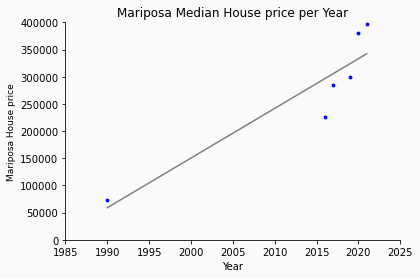

In [136]:
plt=__import__("matplotlib.pyplot")

fig, ax = plt.pyplot.subplots()
median_price_Mariposa_df.plot(kind="scatter", x="Year", y="Mariposa", ax=ax, s=8, color="Blue")

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)
ax.set_xlim(1985, 2025)
ax.set_ylim(0, 400000)
ax.title.set_text('Mariposa Median House price per Year')
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Mariposa House price', fontsize=9)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

lr = LinearRegression()
x = median_price_Mariposa_df["Year"].values.reshape(-1, 1)
y = median_price_Mariposa_df["Mariposa"].values.reshape(-1, 1) 

lr.fit(x, y)
y_pred = lr.predict(x)
ax.plot(x, y_pred, color="grey")

print(lr.intercept_)
print(lr.coef_)

The linear regression model of the median house price of Mariposa was found. The linear regression equation can be written as `y = 9136.06x - 18121719.0`, where y is the price of Mariposa and x is the year. While the slope large and positive, the median house price has been growing fast each year. The future value can also be estimated. As an example, the housing price after 10 years, which is 2031, can be predicted.

In [137]:
year = 2031
Price = 9136.06*year - 18121719.0
Price

433618.8599999994

The price of the house after 10 years would be $433618.86 in Mariposa.

#### New Data from obtained Information

Now, the collected data, including the predicted value, will be made into a data frame. The “3x Rule” will be used again. The rule assumes that the price that people can afford is three times the annual gross income (Dogen, 2020). First, the data frame will be created to make the analysis more efficient from the calculated values.

In [138]:
housing = {'Year':  ['1990', '2019','2031'],
        'Santa Clara Income': ['52077.58', '132444.00', '145187.20'],
        'Santa Clara House Price': ['108975.0', '1225000.0','1796047.91'],
        'Mariposa Income': ['34158.0', '52760.0','62143.98'],
        'Mariposa House Price': ['73300.0', '299900.0','433618.86']    
        }
housing_df = pd.DataFrame(housing, columns = ['Year', 'Santa Clara Income', 'Santa Clara House Price', 'Mariposa Income', 'Mariposa House Price'])
cols = housing_df.columns
housing_df[cols] = housing_df[cols].apply(pd.to_numeric, errors='coerce')
housing_df

,Year,Santa Clara Income,Santa Clara House Price,Mariposa Income,Mariposa House Price
0,1990,52077.58,108975.00,34158.00,73300.00
1,2019,132444.00,1225000.00,52760.00,299900.00
2,2031,145187.20,1796047.91,62143.98,433618.86


With the created data frame, the affordable house price level will be calculated using the "3x Rule".

In [139]:
housing_df["Affordable house for Santa Clara"] = housing_df["Santa Clara Income"]*3
housing_df["Affordable house for Mariposa"] = housing_df["Mariposa Income"]*3
housing_df

,Year,Santa Clara Income,Santa Clara House Price,Mariposa Income,Mariposa House Price,Affordable house for Santa Clara,Affordable house for Mariposa
0,1990,52077.58,108975.00,34158.00,73300.00,156232.74,102474.00
1,2019,132444.00,1225000.00,52760.00,299900.00,397332.00,158280.00
2,2031,145187.20,1796047.91,62143.98,433618.86,435561.60,186431.94


Then, the affordable house price will be compared with the actual house price of each region.

In [140]:
housing_df["Reality for Santa Clara"] = housing_df["Affordable house for Santa Clara"] - housing_df["Santa Clara House Price"]
housing_df["Reality for Mariposa"] = housing_df["Affordable house for Mariposa"] - housing_df["Mariposa House Price"]
housing_df

,Year,Santa Clara Income,Santa Clara House Price,Mariposa Income,Mariposa House Price,Affordable house for Santa Clara,Affordable house for Mariposa,Reality for Santa Clara,Reality for Mariposa
0,1990,52077.58,108975.00,34158.00,73300.00,156232.74,102474.00,47257.74,29174.00
1,2019,132444.00,1225000.00,52760.00,299900.00,397332.00,158280.00,-827668.00,-141620.00
2,2031,145187.20,1796047.91,62143.98,433618.86,435561.60,186431.94,-1360486.31,-247186.92


The description of being affordable or not affordable will be added to the data frame. Since this is only observing the median data, there might exist some differences between individuals.

In [141]:
housing_df['affordability for Santa Clara'] = np.where(housing_df['Reality for Santa Clara'] > 0, "Affordable", "Not Affordable")
housing_df['affordability for Mariposa'] = np.where(housing_df['Reality for Mariposa'] > 0, "Affordable", "Not Affordable")
housing_df

,Year,Santa Clara Income,Santa Clara House Price,Mariposa Income,Mariposa House Price,Affordable house for Santa Clara,Affordable house for Mariposa,Reality for Santa Clara,Reality for Mariposa,affordability for Santa Clara,affordability for Mariposa
0,1990,52077.58,108975.00,34158.00,73300.00,156232.74,102474.00,47257.74,29174.00,Affordable,Affordable
1,2019,132444.00,1225000.00,52760.00,299900.00,397332.00,158280.00,-827668.00,-141620.00,Not Affordable,Not Affordable
2,2031,145187.20,1796047.91,62143.98,433618.86,435561.60,186431.94,-1360486.31,-247186.92,Not Affordable,Not Affordable


As shown, the only year that was affordable was 1990. Recently, it is indicated that the house price is not affordable for median earning people. This data will be analyzed in the graph to visualize.

<ipython-input-142-e9601e5093fe>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "1990","2019","2031"])


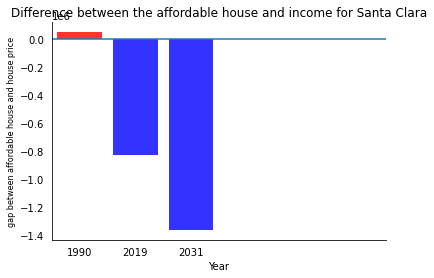

In [142]:
plt=__import__("matplotlib.pyplot")

fig, ax = plt.pyplot.subplots()

colors = ["blue" if x < 0 else "r" for x in housing_df["Reality for Santa Clara"].values]
bars = ax.bar(np.arange(len(colors)), housing_df["Reality for Santa Clara"].values, color=colors, alpha=0.8)
ax.hlines(0, -1.0, 6.0)
ax.set_xticklabels(["", "1990","2019","2031"])

ax.set_xlim(-0.5, 5.5)
ax.set_title("Difference between the affordable house and income for Santa Clara")

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_xlabel("Year")
ax.set_ylabel("gap between affordable house and house price", fontsize = 8)

for _spine in ["right", "top"]:
    ax.spines[_spine].set_visible(False)

<ipython-input-143-423b8338de2f>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "1990","2019","2031"])


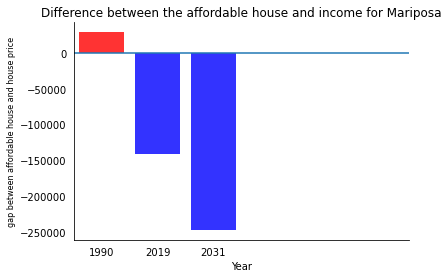

In [143]:
plt=__import__("matplotlib.pyplot")

fig, ax = plt.pyplot.subplots()

colors = ["blue" if x < 0 else "r" for x in housing_df["Reality for Mariposa"].values]
bars = ax.bar(np.arange(len(colors)), housing_df["Reality for Mariposa"].values, color=colors, alpha=0.8)
ax.hlines(0, -1.0, 6.0)
ax.set_xticklabels(["", "1990","2019","2031"])

ax.set_xlim(-0.5, 5.5)
ax.set_title("Difference between the affordable house and income for Mariposa")

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.set_xlabel("Year")
ax.set_ylabel("gap between affordable house and house price" ,fontsize = 8)

for _spine in ["right", "top"]:
    ax.spines[_spine].set_visible(False)

Both graphs clearly indicate that it is getting harder to afford the house. The gap between the affordable house level with income and the actual house price is becoming larger. From this graph, the fact that it gets harder and harder in the future to afford the house assuming that there is no economic boom or shock. The gap will continue to grow. Buying and affording a house in 1990 was a less burden from now.

## Project 3 Conclusion

In project 3, the external factor of fluctuation of the housing market was observed. The main focus was the natural disaster, earthquake. The hypothesis was that the house price where the earthquake occurred would have lower house prices. However, unlike the hypothesis, they were rather more expensive. Thus, the conclusion was that other external factors are more significant than the temporary shock of an earthquake. 

One of the research topics from the introduction was to predict and find the affordability after 1990 to examine if the price of the house was reasonable in 1990. In part 3 of project 3, the future house prices were predicted using linear regression. The predicted value indicated that it gets harder to afford the house in the future. According to the prediction, the gap between the affordable house and the actual house value will expand. Therefore, the house price in 1990, California was more reasonable for people to afford a house within their income.

In future studies, more detailed economic shocks will need to be taken into consideration. For example, the great recession in 2008 due to the financial crisis made the housing market fluctuate. The significant house price crisis could have happened near 1990 as well. It will help analyze the impact of income and the house price to examine if the house price in 1990 was consistent or fluctuated.

# Final Project

In this part of the project, the relationship between the variables will be examined. The dependent variable was the house price based on various other independent variables. The project's goal was to see how the house's price in California, 1990 changed based on external factors. The main independent relationship explored will be the `income`, `age`, `size of house`, and the `population`. Among the four variables, the `income` has been the focus throughout the previous part of the project. However, in this part, the other variables will be explored as well. The assumption was that there was no significant economic shock in 1990. The estimation will be parametric because we are making an assumption about the data that it is a linear function. The relationship between the variables will be examined and determined if they have a linear or non-linear relationship. Also, how each independent variable can explain the dependent data will be investigated.

## Part 2

There are two reasons for the estimate of the distribution, prediction and inference. In this case, the inference is the main reason. The goal is to learn more about the dataset and how it is interpreted in the housing market. In the analysis, the assumption is that the functional form of f is a linear function. Therefore, the estimation will be done using the parametric method. It is helpful that the relation between the input and output variables can be found clearly. However, the disadvantage is that the restriction of linear regression is applied, which may be less accurate in predicting the output variable.

The income and age were chosen for the first part of the project as the independent variable. The house price was a dependent variable. The income clearly had the linear relationship that the house price tends to rise when the income rise. The scatter plot from project one visualized and helped to determine if it was linear. However, the age was not apparent if it had a linear relationship because the scatter plot did not show the positive or negative trend. In this project, age will be manipulated by only looking at the specific age group to examine the relationship again.

In [144]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

### Income and House Price
In the first part of the project, the independent variable was set to be the income and the age. The dependent variable was the house price. The income and the house price would be linear. The income is directly related to the house price because demand for housing depends on the income. If the income rises, people can spend more income on their houses. The income rise increases the demand for houses increases the price. The demand for housing is elastic that rising incomes cause people to spend a higher proportion of their income on the house. Therefore, the assumption can be made that it will have a positive slope.

In [145]:
afford_df.head()

,index,identification,Longitude,Latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,affordable_house,diff,affordability,Coordinates,geom,address
0,59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,25625.0,60000.0,NEAR BAY,76875.0,16875.0,Affordable,POINT (-122.29000 37.82000),"37.82,-122.29","(1688, 24th Street, Oakland, Alameda County, C..."
1,60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,33929.0,75700.0,NEAR BAY,101787.0,26087.0,Affordable,POINT (-122.29000 37.83000),"37.83,-122.29","(4070, Halleck Street, Emeryville, Alameda Cou..."
2,61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,61183.0,75000.0,NEAR BAY,183549.0,108549.0,Affordable,POINT (-122.29000 37.82000),"37.82,-122.29","(1688, 24th Street, Oakland, Alameda County, C..."
3,64,64,-122.30,37.81,48.0,828.0,182.0,392.0,133.0,25938.0,73500.0,NEAR BAY,77814.0,4314.0,Affordable,POINT (-122.30000 37.81000),"37.81,-122.3","(1737, 10th Street, Lower Bottoms, Oakland, Al..."
4,198,198,-122.23,37.77,52.0,769.0,206.0,612.0,183.0,25700.0,72000.0,NEAR BAY,77100.0,5100.0,Affordable,POINT (-122.23000 37.77000),"37.77,-122.23","(400, Lancaster Street, Fruitvale, Oakland, Al..."


The model can be written in mathematical model.

In [146]:
%%latex
\begin{equation} houseprice_i = \beta_0 + \beta_1 income_i + u_i \end{equation}

<IPython.core.display.Latex object>

The graph below shows the scatter plot between median house price and income from the actual data with the prediction line, the linear regression. It visually shows a positive slope.

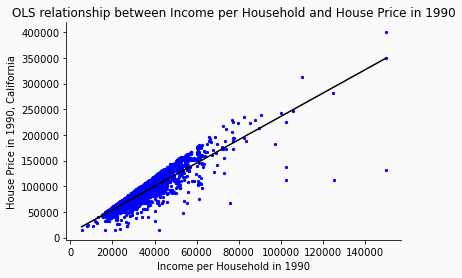

In [147]:
afford_df1_subset = afford_df.dropna(subset=['median_house_value', 'median_income'])


X = afford_df1_subset['median_income']
y = afford_df1_subset['median_house_value']

fig, ax = plt.subplots()
ax.scatter(X, y, marker='o', s = 5, c="blue")

ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)
ax.set_xlabel('Income per Household in 1990')
ax.set_ylabel('House Price in 1990, California')
ax.set_title('OLS relationship between Income per Household and House Price in 1990')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [148]:
afford_df['const'] = 1

The pandas data frame with statsmodels was used. The type function shows that it is a regression model.

In [149]:
reg1 = sm.OLS(endog=afford_df['median_house_value'], exog=afford_df[['const', 'median_income']], \
    missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

The model will fit the data and find estimates of the parameters.

In [150]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [151]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     7362.
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:23:50   Log-Likelihood:                -20985.
No. Observations:                1890   AIC:                         4.197e+04
Df Residuals:                    1888   BIC:                         4.198e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8978.3864   1003.925      8.943

The R-squared can explain 0.796 of the model obtained. The Adj. R-squared can explain 79.6% of the variation of the data. Since the value is relatively high, it can explain the model well. The F-statistic can explain the model in general about the outcome variable, the house price under the null hypothesis. The F-statistic was 7362. When 1 unit of the median income increases, it will increase the affordable house price by 2.2705.

- The intercept $\hat{\beta_0} = 8978.3864$. If the income of the household is zero, they can buy the house that is `$8978.3864` in theory. However, it will be challenging to buy a house that is cheap as the intercept. Therefore, interpreting the intercept may cause bias. It would be better to ignore the intuition of the y-intercept.
- The slope $\hat{\beta_1} = 2.2705$. While the slope is positive, it will have positive relation on the house price. As one unit of income increases, the house price increase by 2.2705.
- The P-value is 0 that the slope implies that effect of income change is statisistically significant. It used the p<0.05 as a rejection value.
- The R-squared value of 0.796 indicates that around 79.6% of varaiation in price of house is explained by the income difference.

The mathematical expression of the calculated model is:

In [152]:
%%latex
\begin{equation} \hat{houseprice_i} = 8978.3864 + 2.2705 income_i  \end{equation}

<IPython.core.display.Latex object>

The equation above describes the line that best fits the data.

In [153]:
mean_income = np.mean(afford_df1_subset['median_income'])
mean_income

35273.37830687831

In [154]:
predicted_house_price = 8978.3864 + (2.2705)  * 35273.37830687831
predicted_house_price

89066.59184576721

In [155]:
results.predict(exog=[1, mean_income])

array([89068.04021164])

The code above predicts the house price for every value of different income along the linear line. The graph below shows the predicted value into points. The blue points are predicted from the model, and the green points are from the data, the actual observation.

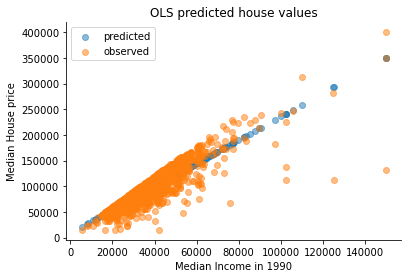

In [156]:
afford_df1_plot = afford_df.dropna(subset=['median_house_value', 'median_income'])

# Plot predicted values

fix, ax = plt.subplots()
ax.scatter(afford_df1_plot['median_income'], results.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(afford_df1_plot['median_income'], afford_df1_plot['median_house_value'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted house values')
ax.set_xlabel('Median Income in 1990')
ax.set_ylabel('Median House price')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

The blue points are well mixed with the orange points. It indicates the prediction mostly matches with the original dataset.

### Age and House Price
The age factor was assumed to be similar to the income. As people get older and get more professional in their work, the higher income, they can earn. However, a slight difference could be made. People retire from work after a certain age, around 65 or 70. From then, they will not have income, and they have to live with the pensions and their past earnings. Then, they will tend to smooth out the consumption rather than using the money all at once, according to the neoclassical consumption model. Therefore, the people will most likely try to afford the house before retirement. Using these assumptions, the relationship between the variables will have a linear relation until retirement.

The model can be written in mathematical model.

In [157]:
%%latex
\begin{equation} houseprice_i = \beta_0 + \beta_1 age_i + u_i \end{equation}

<IPython.core.display.Latex object>

The graph below shows the scatter plot between median house price and age level from the actual data with the prediction line, the linear regression. It visually shows a negative slope.

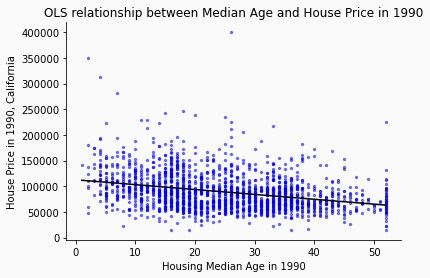

In [158]:
afford_df2_subset = afford_df.dropna(subset=['median_house_value', 'housing_median_age'])


X = afford_df2_subset['housing_median_age']
y = afford_df2_subset['median_house_value']

fig, ax = plt.subplots()
ax.scatter(X, y, marker='o', s=5, c="blue", alpha=0.5)

ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)
ax.set_xlabel('Housing Median Age in 1990')
ax.set_ylabel('House Price in 1990, California')
ax.set_title('OLS relationship between Median Age and House Price in 1990')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

The pandas data frame with statsmodels was used. The type function shows that it is a regression model.

In [159]:
reg2 = sm.OLS(endog=afford_df['median_house_value'], exog=afford_df[['const', 'housing_median_age']], \
    missing='drop')
type(reg2)

statsmodels.regression.linear_model.OLS

The model will fit the data and find estimates of the parameters.

In [160]:
results = reg2.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [161]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     203.2
Date:                Sat, 17 Apr 2021   Prob (F-statistic):           7.16e-44
Time:                        11:23:50   Log-Likelihood:                -22390.
No. Observations:                1890   AIC:                         4.478e+04
Df Residuals:                    1888   BIC:                         4.479e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.126e+05   1827

The R-squared can explain 0.097 of the model obtained. The Adj. R-squared can explain 9.7% of the variation of the data. They are both relatively low that they cannot explain the model well enough. The F-statistic can explain the model in general about the outcome variable, the house price under the null hypothesis. The F-statistic was 203.2. When 1 unit of the median age increases, it will decrease the affordable house price by -949.4750.

- The intercept $\hat{\beta_0} = 1.126e+05 $. If the person is purchasing a house at age zero, the house price would be equal to the intercept. However, it might not be the most relevant information while it is impossible for a baby to buy a house himself/herself unless their parent buys one for them.
- The slope $\hat{\beta_1} = -949.4750$. While the slope is negative, it will have negative relation on the house price. As one unit of age increases, the house price decrease by -949.4750.
- The P-value is 0 that the slope implies that effect of income change is statisistically significant. It used the p<0.05 as a rejection value.
- The R-squared value of 0.097 indicates that only 9.7% of varaiation in price of house is explained by the age difference.

The mathematical expression of the calculated model is:

In [162]:
%%latex
\begin{equation} \hat{houseprice_i} = 1.126e+05 -949.4750 age_i  \end{equation}

<IPython.core.display.Latex object>

The equation above describes the line that best fits the data.

In [163]:
mean_age = np.mean(afford_df2_subset['housing_median_age'])
mean_age

24.83068783068783

In [164]:
predicted_house_price = 1.126e+05 + (-949.4750)  * 24.83068783068783
predicted_house_price

89023.88267195768

In [165]:
results.predict(exog=[1, mean_age])

array([89068.04021164])

The code above predicts the house price for every value of different age along the linear line. The graph below shows the predicted value into points. The blue points are predicted from the model, and the green points are from the data, the actual observation.

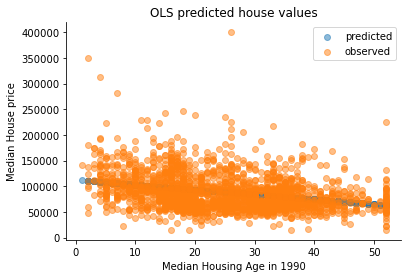

In [166]:
afford_df2_plot = afford_df.dropna(subset=['median_house_value', 'housing_median_age'])

# Plot predicted values

fix, ax = plt.subplots()
ax.scatter(afford_df2_plot['housing_median_age'], results.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(afford_df2_plot['housing_median_age'], afford_df2_plot['median_house_value'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted house values')
ax.set_xlabel('Median Housing Age in 1990')
ax.set_ylabel('Median House price')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

The blue points (predicated points) are well mixed with the orange points. It indicates the prediction mostly matches with the original dataset.

### Size of House and House Price
The size of the house and the house price will have a linear relationship. The larger the house is, it requires more labour from worker to build the house and require more material to produce. The larger house will take more time that needs more money to make payment for all the labour and resource to build the house. The more room there are, the more expensive the house will be. Therefore, it will attain a linear relationship.

The model can be written in mathematical expression.

In [167]:
%%latex
\begin{equation} houseprice_i = \beta_0 + \beta_1 roomsupply_i + u_i \end{equation}

<IPython.core.display.Latex object>

The graph below shows the scatter plot between median house price and total bedroom from the actual data with the prediction line, the linear regression. It visually shows a weak positive slope.

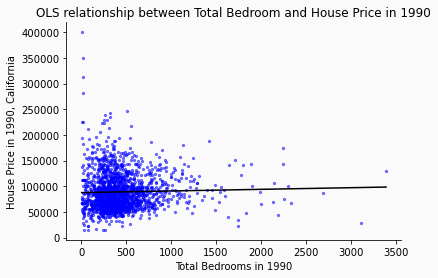

In [168]:
afford_df3_subset = afford_df.dropna(subset=['median_house_value', 'total_bedrooms'])


X = afford_df3_subset['total_bedrooms']
y = afford_df3_subset['median_house_value']

fig, ax = plt.subplots()
ax.scatter(X, y, marker='o', s=5, c="blue", alpha=0.5)

ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)
ax.set_xlabel('Total Bedrooms in 1990')
ax.set_ylabel('House Price in 1990, California')
ax.set_title('OLS relationship between Total Bedroom and House Price in 1990')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

The pandas data frame with statsmodels was used. The type function shows that it is a regression model.

In [169]:
reg3 = sm.OLS(endog=afford_df['median_house_value'], exog=afford_df[['const', 'total_bedrooms']], \
    missing='drop')
type(reg3)

statsmodels.regression.linear_model.OLS

The model will fit the data and find estimates of the parameters.

In [170]:
results = reg3.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [171]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.499
Date:                Sat, 17 Apr 2021   Prob (F-statistic):              0.221
Time:                        11:23:51   Log-Likelihood:                -22486.
No. Observations:                1890   AIC:                         4.498e+04
Df Residuals:                    1888   BIC:                         4.499e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8.769e+04   1389.644     63.

The R-squared can explain 0.001 of the model obtained. The Adj. R-squared can explain 0.1% of the variation of the data. They are both extremely low that they cannot explain the model at all. The F-statistic can explain the model in general about the outcome variable, the house price under the null hypothesis. The F-statistic was 1.499. When 1 unit of the total bedroom increases, it will increase the affordable house price by 3.1776.

- The intercept $\hat{\beta_0} = 8.769e+04 $. When the number of rooms provided for households is zero, the house price would be equal to the intercept. However, this information piece is not helpful, while it does not make sense to have houses without any room in the whole region.
- The slope $\hat{\beta_1} = 3.1776$. While the slope is positive, number of room will have positive relation on the house price. As one unit of number of room increases, the house price increase by 3.1776.
- The P-value is 0.221 that the slope implies that effect of income change is not statisistically significant. It used the p<0.05 as a rejection value.
- The R-squared value of 0.001 indicates that only 0.1% of varaiation in price of house is explained by the number of room difference.

The mathematical expression of the calculated model is:

In [172]:
%%latex
\begin{equation} houseprice_i = 8.769e+04 +  3.1776 roomsupply_i  \end{equation}

<IPython.core.display.Latex object>

The equation above describes the line that best fits the data.

In [173]:
mean_room = np.mean(afford_df3_subset['total_bedrooms'])
mean_room

432.8613756613757

In [174]:
predicted_house_price =  8.769e+04 + 432.8613756613757 * 3.1776
predicted_house_price

89065.46030730159

In [175]:
results.predict(exog=[1, mean_room])

array([89068.04021164])

The code above predicts the house price for every value of different total bedroom count along the linear line. The graph below shows the predicted value into points. The blue points are predicted from the model, and the green points are from the data, the actual observation.

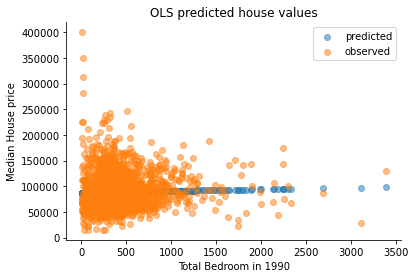

In [176]:
afford_df3_plot = afford_df.dropna(subset=['median_house_value', 'total_bedrooms'])

# Plot predicted values

fix, ax = plt.subplots()
ax.scatter(afford_df3_plot['total_bedrooms'], results.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(afford_df3_plot['total_bedrooms'], afford_df3_plot['median_house_value'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted house values')
ax.set_xlabel('Total Bedroom in 1990')
ax.set_ylabel('Median House price')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

The blue points are minimally mixed with the orange points. It indicates the prediction does not match with the original dataset very well. The linear regression might not be the best regression for the dataset. In the future study, it would be better to consider other regression to examine the distribution.

### Population and House Price
The more households live in the region, the higher the house price will be. All households need a house to live in. If there is more competition to get the house, the house price will tend to increase. The supply of house is slower than the demand because building houses are inelastic. It is time-consuming while they need to get permission and gather the required resources. Therefore, the population and the house price will have a linear relationship.

The model can be written in mathematical expression.

In [177]:
%%latex
\begin{equation} houseprice_i = \beta_0 + \beta_1 population_i + u_i \end{equation}

<IPython.core.display.Latex object>

The graph below shows the scatter plot between median house price and population from the actual data with the prediction line, the linear regression. It visually shows a weak positive slope.

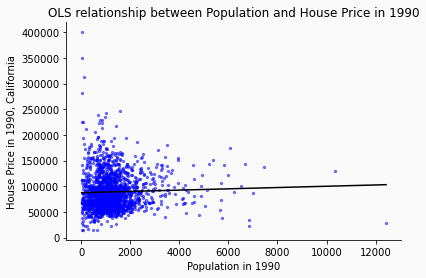

In [178]:
afford_df4_subset = afford_df.dropna(subset=['median_house_value', 'population'])


X = afford_df4_subset['population']
y = afford_df4_subset['median_house_value']

fig, ax = plt.subplots()
ax.scatter(X, y, marker='o', s=5, c="blue", alpha=0.5)


ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)
ax.set_xlabel('Population in 1990')
ax.set_ylabel('House Price in 1990, California')
ax.set_title('OLS relationship between Population and House Price in 1990')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

The pandas data frame with statsmodels was used. The type function shows that it is a regression model.

In [179]:
reg4 = sm.OLS(endog=afford_df['median_house_value'], exog=afford_df[['const', 'population']], \
    missing='drop')
type(reg4)

statsmodels.regression.linear_model.OLS

The model will fit the data and find estimates of the parameters.

In [180]:
results = reg4.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [181]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.125
Date:                Sat, 17 Apr 2021   Prob (F-statistic):              0.145
Time:                        11:23:51   Log-Likelihood:                -22485.
No. Observations:                1890   AIC:                         4.497e+04
Df Residuals:                    1888   BIC:                         4.499e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.752e+04   1341.354     65.246      0.0

The R-squared can explain 0.001 of the model obtained. The Adj. R-squared can explain 0.1% of the variation of the data. They are both extremely low that they cannot explain the model at all. The F-statistic can explain the model in general about the outcome variable, the house price under the null hypothesis. The F-statistic was2.125. When 1 unit of the population increases, it will increase the affordable house price by 1.2533.

- The intercept $\hat{\beta_0} = 8.752e+04  $. When the population is zero, the house price would be equal to the intercept. However, the information is irrelevant, while there is almost no chance to make the population equivalent to zero.
- The slope $\hat{\beta_1} = 1.2533 $. While the slope is positive, number of room will have positive relation on the house price. As one unit of population increases, the house price increase by 1.2533 units.
- The P-value is  0.145 that the slope implies that effect of income change is not statisistically significant. It used the p<0.05 as a rejection value.
- The R-squared value of 0.001 indicates that only 0.1% of varaiation in price of house is explained by the population difference.

The mathematical expression of the calculated model is:

In [182]:
%%latex
\begin{equation} houseprice_i = 8.752e+04  + 1.2533  population_i \end{equation}

<IPython.core.display.Latex object>

The equation above describes the line that best fits the data.

In [183]:
mean_pop = np.mean(afford_df4_subset['population'])
mean_pop

1236.8370370370371

In [184]:
predicted_house_price = 8.752e+04 + (1.2533)  * 1236.8370370370371
predicted_house_price

89070.12785851852

In [185]:
results.predict(exog=[1, mean_pop])

array([89068.04021164])

The code above predicts the house price for every value of different population along the linear line. The graph below shows the predicted value into points. The blue points are predicted from the model, and the green points are from the data, the actual observation.

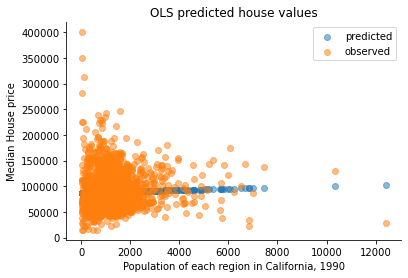

In [186]:
afford_df4_plot = afford_df.dropna(subset=['median_house_value', 'population'])

# Plot predicted values

fix, ax = plt.subplots()
ax.scatter(afford_df4_plot['population'], results.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(afford_df4_plot['population'], afford_df4_plot['median_house_value'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted house values')
ax.set_xlabel('Population of each region in California, 1990')
ax.set_ylabel('Median House price')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

The blue points do not have a similar distribution compared to the orange points. It indicates the prediction does not match with the original dataset very well. The linear regression might not be the most optimal regression for this dataset. In the future study, it would be better to consider other regression to examine the distribution.

### Result
The relationship between the four independent variables and the dependent variable, the house price, was observed from the four different linear regression. Some had a relevant relationship, while the others had a low to no linear relationship.

The first linear regression that was done with the income showed a high relation. The regression helped to predict and inference the relationship. The economic perspective fits the model that the demand for housing rises, incomes rise while houses can be considered luxury goods. It causes people to spend a higher proportion of their income on the house. The assumption was correct and made positive relation. This relation is the most critical part of the four relationships. It showed the most solid that could be explained with the most R-squared value. 

Therefore, the preferred specification would be the first linear regression, which is done with the income and the house price. It was the had most apparent positive linear lineation that was found among four linear regressions.

The second linear regression was done with age. It showed a negative relation. It was not very strong, but it was enough to be statistically significant. The more older people are, they tend to be less housing. The other interpretation would be that the older people had already bought the house that they are not in the housing market later in the age.

The third and fourth regressions were done with the number of rooms and the population. They both showed a very weak positive relation. Using the p-value test, they were not significant. Therefore, the economic interpretation made before the regression does not fit the data.


The data might be bias while it did not include all the houses in California. However, it helped to understand what value can fluctuate the affordable house price the most. People should interpret the income when they try to buy a house.

## Part 3

Lastly, machine learning will be introduced to analyze the data. This section aims to explore and provide an accurate mapping from the input variables (house size, age, income and population) to a continuous output variable, which is the house price. 

The tree method will be used. It is for both classification and regression. It will create a tree using the covariates and splits to predict the outcome.

The method in written words, there are two steps for this method. First, divide the predictor space into mutually exclusive regions. Then, predict the outcome for all observations that fall into one of the regions divided. It can be done by calculating the average of the output for the training observations of the region.

The tree method is easy to explain and can handle qualitative variables easier than regression. It does not require dummy variables. However, the prediction accuracy level as ML methods is not provided, unlike the other machine learning methods. Also, it is sensitive to the choice of samples. There are advantages and disadvantages to the technique.

##### Prediction
The prediction is that the result will be similar to the last part of the project. The income variable will first be represented as the most important variable with the highest correlation to the house price. In the second branch, the age will appear, and the rooms and population variables will appear at last.

The packages required for machine learning are imported below.

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import (linear_model, metrics)

All the variables are included in `X` for the regression models. The same variables are chosen from the linear regression for machine learning.

In [188]:
X = afford_df.drop(['index','identification','Longitude','Latitude','total_rooms','households', 'median_house_value', 'ocean_proximity', 'affordable_house', 'diff', 'affordability', 'Coordinates', 'geom', 'address', 'const'], axis=1).copy()
for col in list(X):
    X[col] = X[col].astype(float)
X.head()

,housing_median_age,total_bedrooms,population,median_income
0,2.0,43.0,94.0,25625.0
1,52.0,211.0,554.0,33929.0
2,49.0,29.0,86.0,61183.0
3,48.0,182.0,392.0,25938.0
4,52.0,206.0,612.0,25700.0


`y` will contain the output variable, the median house value. It includes the house price that the machine learning for tree method is set up similarly to the linear regression from the previous part.

In [189]:
y = afford_df["median_house_value"]
afford_df["median_house_value"] = y
y.head()

0    60000.0
1    75700.0
2    75000.0
3    73500.0
4    72000.0
Name: median_house_value, dtype: float64

For the regression tree, the maximum depth will be 3. The other depth was also examined. The mean squared error reduced when the depth was increased. The depth of 3 is chosen because the too complicated tree may not do a good job in predicting new data points. The technique is called over-fitting. It is essential to find the depth that can both see the good predicting data and low mean squared error.

In [190]:
from sklearn import tree
sqft_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X,y)

The mean squared error will be calculated using the `X` and `y`.

In [191]:
from sklearn import metrics
y_pred_tree = sqft_tree.predict(X)
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_tree))

Mean Squared Error: 243202879.7523973


##### Objective Function

The predictions from regression trees are piecewise-constant. The rectangular region, R, represents the region that contains all the values of X, which are the input variables (house size, age, income and population). Then, the location to split is chosen. The rest of the steps are all repeated until it generates all the branches. The goal is to minimize the mean squared error. `y` represents the output, the price of the house. The equation is described below:

In [192]:
%%latex
$$
\min_{j,s} \left[ \min_{c_1} \sum_{i: x_{i,j} \leq s, x_i \in R}
    (y_i - c_1)^2 + \min_{c_2} \sum_{i: x_{i,j} > s, x_i \in R}
    (y_i - c_2)^2 \right]
$$

<IPython.core.display.Latex object>

For each region, the equation above should be calculated. It represents two split branches from one branch. This equation will be repeated until it reaches the depth of the tree, which was 3 in the project.

##### Regularization Parameters 

Using the regularization parameters is a form of regression that constrains the coefficient estimates towards zero. The fitting procedure involves a loss function. The disadvantage is that it can discourage learning a more complex or flexible model. If there is noise in the house pricing data, then the estimated coefficients will not generalize well to the future data.

In [193]:
%%latex
$$
\min_{tree \subset T} \sum (\hat{f}(x)-y)^2 + \alpha|\text{terminal
   nodes in tree}|
$$

<IPython.core.display.Latex object>

The pruned tree will have equation above. The parameters are the same as before. Based on the equation, the tree regression is formed below.

##### Regression Tree

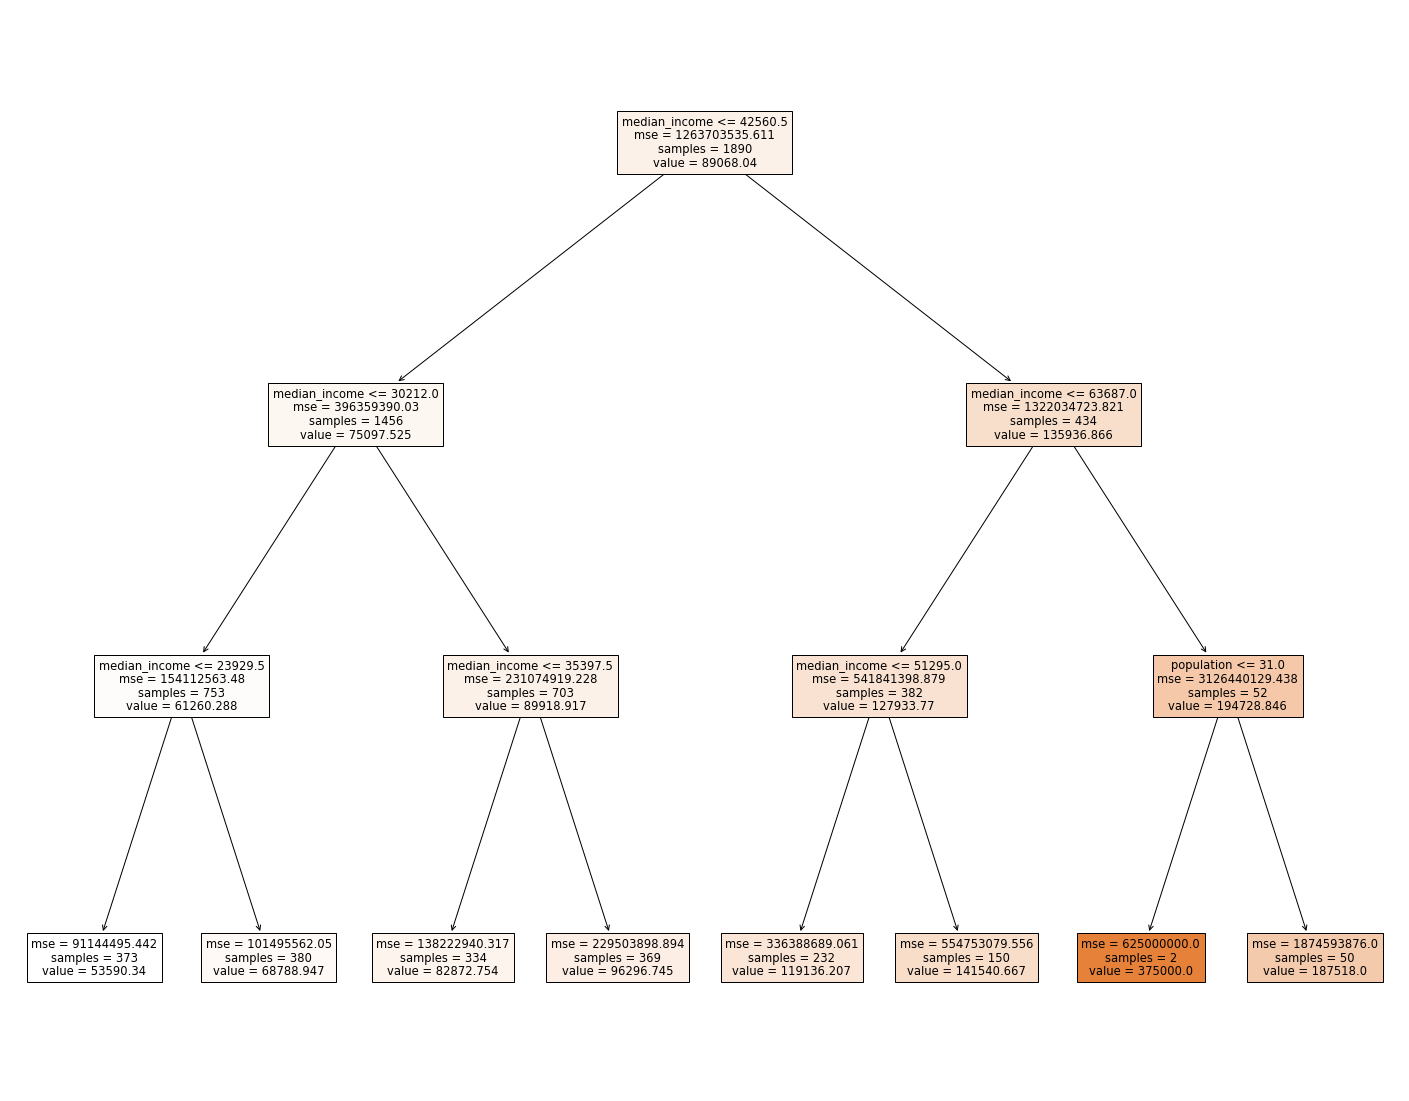

In [194]:
sqrf_fig = plt.figure(figsize=(25,20))
sqrf_fig = tree.plot_tree(sqft_tree, feature_names=X.columns, filled=True)

There are 8 terminal codes that are returned from the graph with the maximum depth of 3. Above, the trees are formed iteratively.

As a result, an essential variable is a median income. It affects the house price the most. The second variables that were described were also the median income. It seems that the median income had the most significant impact and the other variables did not. The only variable that is described other than median income is the population on the second branch. Comparing the MSE from the first branch to the last branch, they have reduced.  

##### Error of Prediction
There were lots of errors in the prediction. The income variable appeared first, which is as predicted. However, the age did not appear the second, and the income variable continued to appear and obtained all the branches. Instead of age, the population variable appeared on the second branch. The population was more significant than the other two variables to reduce the maximum squared error.

### Result

Comparing the result with the linear regression, more information was obtained in machine learning. It explored what variables were able to explain the model by reducing the MSE. The less MSE there is, the better the model fits the data. It showed that the `income` was the most significant variable in the data. Other than the considerable variable, the population was also able to explain the model. The linear regression difference is that the tree regression shows which variable to focus on, while the linear regression requires the readers or the interpreters to read the analyze the result. If the income rises, people can invest more income in their houses. The income rise increases the demand for homes increases the price. Therefore, income can explain the model well.  For the population, it is probably related to the house price because the more competition to get the house, the house price will tend to increase. The other variable does not help to explain the model well. Therefore, the most critical variable that can possibly fluctuate the house price is found throughout the step. The advantage of the tree method over the linear regression method is that the mse reduction is clearly shown. Therefore, it is helpful to interpret the result of how the distributions can explain the data.

Some parts agreed with the linear regression that was done in the first part of the final project. They both agreed that the income of the households controls the house price. As they earn more, they have more money to invest in the house. However, in the linear regression, age was concluded to be the second-most important variable to consider. The tree method indicated that the population could better explain the distribution over age. Therefore, it may require further studies. It would be helpful to find other regression other than linear regression. Then, it will gain another perspective to approach the distribution.

# Conclusion

The housing data in 1990, California from `Kaggle` is explored from various economic perspectives in the project. The variable housing price was the main focus as the output. For instance, the price and the income were used to analyze if incomes in California were enough to afford the house. The variables were analyzed in various methods using graphs, charts, and maps to explore this goal. Besides using the primary data, the plan was also to predict the future house values and affordability. For a more thorough analysis, other data sets that were imported and web-scraped were also considered. The new data made the information clearer and helped to understand the primary data better. Also, the interpretation of the relation between the output, the house price and the input variables were explored thoroughly to investigate the cause of house price difference.

From project 1, the observation about the age, house income and the house price were introduced. The main method, "rule of 3," helped to determine if the houses were affordable or not. The conclusion was that there were very few people who could afford the home. Also, the age level had an irrelevant relationship with the other variables. Therefore, the age was excluded in the other projects while it was found insignificant. From project 2, the correlation the house price and median income was found numerically. The coefficient was 0.69 that which proved that there was moderate relation between income and price. Also, the maps were created to locate the houses that we're able to afford the house. The house affording households tended to live where the household had a higher income. It indicated that the higher income, the higher the house price that can afford. From project 3, the new sources of data were introduced. They were merged with the primary data and helped to predict the future value. Lastly, from the final project, the relation between the variables was obtained. The primary focus of interest is which factor can manipulate the house price using the regressions. Both linear and tree regression explains that income is the most critical factor that changes the house price.

As a result, the housing market back in 1990 could understand that it was harsh for households that did not earn a high income. However, high-earning people were able to afford a house in 1990, disregarding the age level. Also, the people tended to live in the specific county who were able to earn high wages. In the future, the housing market in California will be worse than in 1990. The income will not be able to grow as fast as the house price rising speed. While income is the most crucial variable, it will affect the house price by a lot. The economists should give the new policy to slow down the house price growth rate for the balance.

For more study on this topic, new variable consideration will be helpful. For example, the earthquake was used as an example of an economic shock to the market. However, it did not significantly impact the housing price even though the overall financial index decreased. Therefore, studying the other shocks, such as the great recession that affected the house price, would help figure out why the gap between the income and the house price is rising. Also, gathering more data would be helpful to reduce the bias of the result. In project 2, some counties had very few houses, making project three hard to analyze and create bias.

For further study, the "3x rule" might not be the best way to examine affordability. Only nearly 10 percent of the data was used for most of the analysis. People who obtained the house without reaching the 3x rule should be studied in the future. If they could not earn enough, what would be the way that they have bought the house? It will be significant to explore this factor to interpret the alternative ways to buy a house in the US. Further research to support other factors and data should be found for this topic.

The visualization of the project may be improved overall. Most of the visualizations are two-dimensional that may not help to visualize some parts of the projects. For example, the maps would be more approachable if they were drawn more realistically. Indicating buildings and other infrastructure could help to determine why particular areas are more expensive or cheaper. Therefore, for improvement, more advanced visualization is required.

The usage of various regressions could be improved. In this project, the regression was constrained to linear regression due to the limited knowledge. However, there were many cases that the data that did not fit the linear regression. For example, the age or the population did not seem to fit the linear regression. The result may improve, and the prediction will become more accurate by trying the other regressions such as polynomial Regression or Bayesian Linear Regression. The limitations can be enhanced by reading and comparing many regressions to the data generated in the project. The similar shape of the graphs may help identify the model more easily.

The project is done to analyze the house price of California in 1990. The analysis done from the economic perspective will help to find the future house pricing and make predictions more accurately.

## Bibilography

1. Fekrazad, A. (2019, February). Earthquake-risk salience and housing prices: Evidence from California. Journal of Behavioral and Experimental Economics. ISSN 2214-8043. https://doi.org/10.1016/j.socec.2019.01.001.

2. Dogen, S. (2020, September 10). Always follow the ’30/30/3 rule’ before buying a home during Covid-19, says finance expert—here’s why. CNBC. https://www.cnbc.com/2020/09/10/always-use-the-30-30-3-rule-before-buying-a-home-during-pandemic-says-finance-real-estate-expert.html

3. Graham, K. (2020, December 23). Historical Mortgage Rates From The 1970s To 2020: Averages And Trends For 30-Year Fixed Mortgages. Rocket Mortgage.https://www.rocketmortgage.com/learn/historical-mortgage-rates-30-year-fixed

4. Nugent, C. (2018). California Housing Prices. Kaggle. https://www.kaggle.com/camnugent/california-housing-prices

5. Richardson, B. (2020, December 18). Experts Predict What The Housing Market Will Be Like In 2021. Forbes. https://www.forbes.com/sites/brendarichardson/2020/12/16/experts-predict-what-the-housing-market-will-be-like-in-2021/?sh=354f8a8536dc. 

6. Statista Research Department. (2019, June 20). U.S. Affordable Housing - Statistics & Facts. Statista. https://www.statista.com/topics/5081/affordable-housing-in-the-us/